# 🚀 SAIR PyTorch Mastery - Lecture 3: Convolutional Neural Networks - Vision & Beyond

**Course:** Ultimate Applied Deep Learning with PyTorch  
**Module:** Computer Vision & CNN Architectures  
**Instructor:** Mohammed Awad Ahmed (Silva)  
**SAIR Community:** Building Sudan's AI Future 🇸🇩

## 📘 How to Use This Notebook

This is a **standalone, self-teaching lecture notebook** designed to replace traditional video lectures. Here's how to get the most from it:

**How to Study:**
1. **Read all markdown cells carefully** - they contain explanations, mental models, and reasoning
2. **Run code cells sequentially** - don't skip ahead as each builds on the previous
3. **Pause at "Stop & Think" prompts** - make predictions before running the next cell
4. **Experiment with the code** - change parameters and see what happens

**Time Commitment:** ~3-4 hours for complete understanding

**Learning Outcomes:** After completing this notebook, you will be able to:
1. Explain why linear layers fail for image data
2. Implement convolution operations from scratch
3. Build and train CNN architectures from simple to AlexNet
4. Visualize and interpret what CNNs learn
5. Apply convolutions to 1D, 2D, and 3D data
6. Debug common CNN implementation issues

**This Notebook Builds On Lectures 1 & 2:**
- Lecture 1: PyTorch fundamentals, training loops
- Lecture 2: Data pipelines, DataLoader optimization
- This Lecture: CNN architectures for computer vision

## 📈 YOUR LEARNING JOURNEY TRACKER

**Instructions:** Check off sections as you complete them. Note your confidence (1-5) and time spent.

| Part | Section | Status | Time | Confidence | Notes |
|------|---------|--------|------|------------|-------|
| **Part 0** | Mathematical Foundations | □ | __ min | __ | |
| **Part 1** | Why Linear Layers Fail | □ | __ min | __ | |
| **Part 2** | Signal Processing & Convolution | □ | __ min | __ | |
| **Part 3** | CNN Building Blocks | □ | __ min | __ | |
| **Part 4** | Kernel Visualization Library | □ | __ min | __ | |
| **Part 5** | SimpleCNN from Scratch | □ | __ min | __ | |
| **Part 6** | AlexNet Implementation | □ | __ min | __ | |
| **Part 7** | CNN Architecture Comparison | □ | __ min | __ | |
| **Part 8** | Im2Col & Matrix View | □ | __ min | __ | |
| **Part 9** | Training & Diagnostics | □ | __ min | __ | |
| **Part 10** | Beyond 2D Convolutions | □ | __ min | __ | |
| **Part 11** | Transfer Learning Preview | □ | __ min | __ | |

**Goal:** Complete all parts with confidence ≥4/5  
**Expected Total Time:** 3-4 hours

---

## 🎯 Why This Lecture Matters

In Lectures 1 & 2, you learned how to build neural networks and create efficient data pipelines. But there's a fundamental problem with the networks we've built so far:

**They treat images as flattened vectors, destroying spatial relationships!**

> "CNNs don't just learn patterns—they learn patterns in context. A diagonal line means something different in the corner vs the center of an image."

**Key Insight**: Convolutional Neural Networks (CNNs) revolutionized computer vision by preserving spatial structure while being parameter-efficient. Today, CNNs power everything from facial recognition to medical imaging.

---

### 🎯 By the end of this lecture, you will be able to:

**Core Understanding:**

1. ✅ Explain the mathematical foundation of convolution operations
2. ✅ Explain why dense networks fail for spatial data
3. ✅ Implement convolution operations manually
4. ✅ Visualize what each CNN layer learns

**Practical Skills:**

5. ✅ Build CNN architectures from simple to AlexNet
6. ✅ Train CNNs on CIFAR-10 dataset
7. ✅ Apply convolutions to 1D, 2D, and 3D data

**Professional Skills:**

8. ✅ Debug CNN shape mismatches and common errors
9. ✅ Optimize CNN architectures for different tasks
10. ✅ Interpret CNN predictions through visualization

---

### 📋 PREREQUISITES CHECK

Before starting, make sure you're comfortable with:

**From Lecture 1 (PyTorch Foundations):**
- PyTorch tensors and basic operations
- nn.Module and neural network construction
- Training loops and optimization
- Device management (CPU/GPU)

**From Lecture 2 (Data Pipelines):**
- Dataset and DataLoader creation
- Data augmentation and preprocessing
- Performance optimization

**If you need a refresher:**
- Review Lecture 1 on training loops
- Review Lecture 2 on DataLoader optimization

## 🛠️ Setup & Environment Configuration

Let's begin by importing all necessary libraries and setting up our environment.

In [1]:
# Initial Setup and Imports
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import numpy as np
import matplotlib.pyplot as plt
import time
import os
from pathlib import Path
from PIL import Image
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

# For reproducibility
torch.manual_seed(42)
np.random.seed(42)

print("✅ All imports loaded successfully!")
print(f"PyTorch version: {torch.__version__}")
print(f"GPU available: {torch.cuda.is_available()}")
if torch.cuda.is_available():
    print(f"GPU: {torch.cuda.get_device_name(0)}")
    print(f"GPU Memory: {torch.cuda.get_device_properties(0).total_memory / 1e9:.1f} GB")

# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

✅ All imports loaded successfully!
PyTorch version: 2.9.0+cu126
GPU available: True
GPU: Tesla T4
GPU Memory: 15.8 GB


# 🔧 PART 0: Mathematical Foundations - Convolution Demystified

## 📊 From Signal Processing to Deep Learning

**Convolution is NOT a new concept** - it's been used for centuries in signal processing, physics, and engineering. Let's build the mathematical intuition before diving into CNNs.

### The Core Mathematical Operation

**Discrete 2D Convolution Formula:**
$$
(f * g)[i, j] = \sum_{m=-\infty}^{\infty} \sum_{n=-\infty}^{\infty} f[m, n] \cdot g[i-m, j-n]
$$

**Simpler (what we actually implement):**
$$
\text{output}[i, j] = \sum_{m=0}^{k-1} \sum_{n=0}^{k-1} \text{input}[i+m, j+n] \cdot \text{kernel}[m, n]
$$

**Where:**
- $f$ = input signal/image
- $g$ = kernel/filter
- $k$ = kernel size
- $*$ = convolution operator

### Why Not Fourier Transform? The Computational Trade-off

**Theoretical:** In signal processing, convolution in spatial domain = multiplication in frequency domain via Fourier Transform.

**BUT for images:**
- **FFT Complexity:** $O(N \log N \times M \log M)$ for 2D FFT
- **Direct Convolution:** $O(N \times M \times k^2)$ where k is kernel size

**Key Insight:** For small kernels (3×3, 5×5), direct convolution is **faster** than Fourier Transform!

**Example:** For 224×224 image with 3×3 kernel:
- FFT: ~224² × log(224)² ≈ 50,176 × 11 ≈ 552,000 operations
- Direct: 224² × 3² = 50,176 × 9 = 451,584 operations

> **Why CNNs use small kernels:** Small kernels + spatial convolution = computationally efficient + preserves local features!

## 🧪 Signal Processing Example: Detecting a Spike with Noise

Let's see convolution in action with a classic signal processing problem: detecting a spike in noisy data.

SIGNAL PROCESSING EXAMPLE: Spike Detection


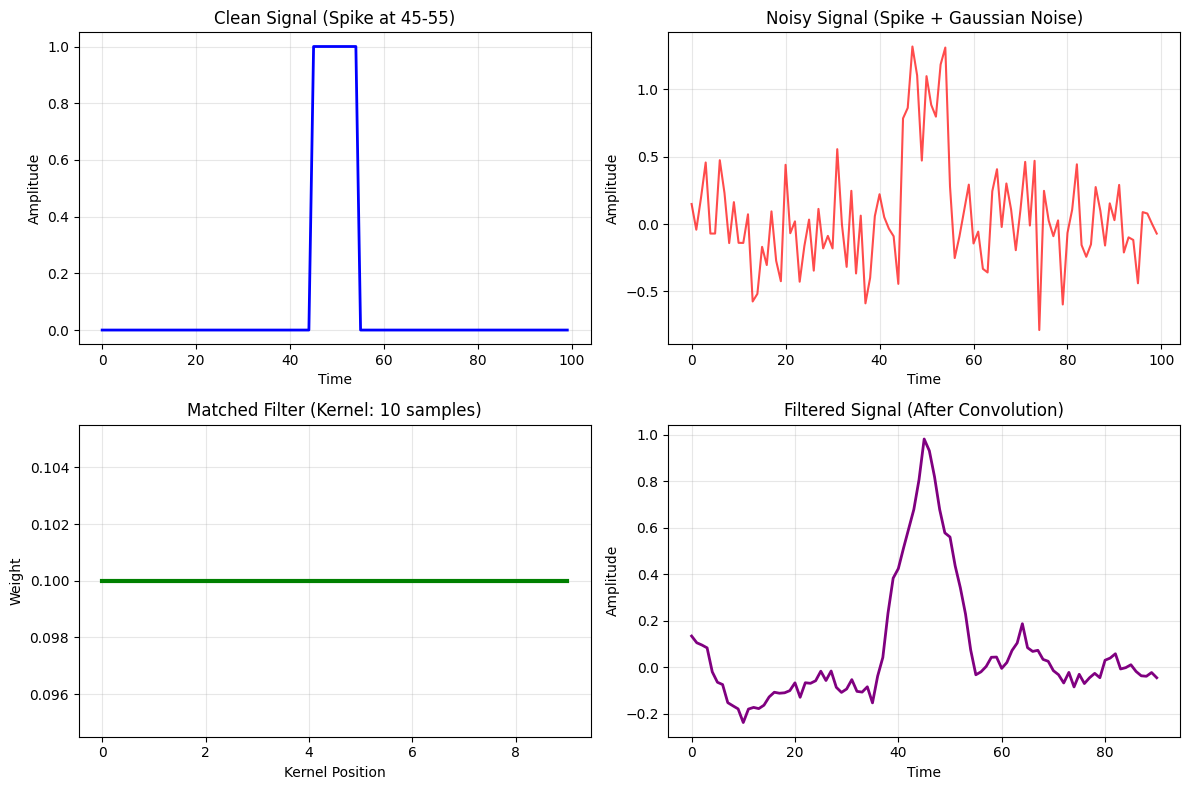


🧠 What Just Happened?
1. We had a clean signal with a spike (positions 45-55)
2. We added noise to make detection difficult
3. We designed a filter that matches the spike shape
4. Convolution amplified the signal while suppressing noise!

🎯 Key Insight: The filter acts as a TEMPLATE MATCHER!
   • When filter aligns with spike → large output
   • When filter aligns with noise → small output
   • This is EXACTLY what CNN filters do in images!


In [2]:
print("="*60)
print("SIGNAL PROCESSING EXAMPLE: Spike Detection")
print("="*60)

# Create a clean signal with a spike
time_steps = 100
clean_signal = np.zeros(time_steps)
clean_signal[45:55] = 1.0  # Spike from position 45-55

# Add Gaussian noise
np.random.seed(42)
noise = np.random.normal(0, 0.3, time_steps)
noisy_signal = clean_signal + noise

# Create a matched filter (kernel that looks like our spike)
matched_filter = np.ones(10) / 10  # Average over 10 time steps

# Manual 1D convolution
def conv1d_simple(signal, kernel):
    """Simple 1D convolution implementation"""
    kernel_len = len(kernel)
    signal_len = len(signal)
    output_len = signal_len - kernel_len + 1
    output = np.zeros(output_len)
    
    for i in range(output_len):
        output[i] = np.sum(signal[i:i+kernel_len] * kernel)
    
    return output

# Apply convolution
filtered_signal = conv1d_simple(noisy_signal, matched_filter)

# Visualize
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Clean signal
axes[0, 0].plot(clean_signal, 'b-', linewidth=2)
axes[0, 0].set_title("Clean Signal (Spike at 45-55)")
axes[0, 0].set_xlabel("Time")
axes[0, 0].set_ylabel("Amplitude")
axes[0, 0].grid(True, alpha=0.3)

# Noisy signal
axes[0, 1].plot(noisy_signal, 'r-', alpha=0.7)
axes[0, 1].set_title("Noisy Signal (Spike + Gaussian Noise)")
axes[0, 1].set_xlabel("Time")
axes[0, 1].set_ylabel("Amplitude")
axes[0, 1].grid(True, alpha=0.3)

# Filter
axes[1, 0].plot(matched_filter, 'g-', linewidth=3)
axes[1, 0].set_title(f"Matched Filter (Kernel: {len(matched_filter)} samples)")
axes[1, 0].set_xlabel("Kernel Position")
axes[1, 0].set_ylabel("Weight")
axes[1, 0].grid(True, alpha=0.3)

# Filtered signal - FIXED: Use 'purple' as color and '-' as separate parameter
axes[1, 1].plot(filtered_signal, color='purple', linestyle='-', linewidth=2)
axes[1, 1].set_title("Filtered Signal (After Convolution)")
axes[1, 1].set_xlabel("Time")
axes[1, 1].set_ylabel("Amplitude")
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n🧠 What Just Happened?")
print("1. We had a clean signal with a spike (positions 45-55)")
print("2. We added noise to make detection difficult")
print("3. We designed a filter that matches the spike shape")
print("4. Convolution amplified the signal while suppressing noise!")
print("\n🎯 Key Insight: The filter acts as a TEMPLATE MATCHER!")
print("   • When filter aligns with spike → large output")
print("   • When filter aligns with noise → small output")
print("   • This is EXACTLY what CNN filters do in images!")

## ⚡ Computational Efficiency: Direct vs Fourier Transform

Let's compare the computational complexity of different approaches:

In [3]:
print("="*60)
print("COMPUTATIONAL COMPLEXITY COMPARISON")
print("="*60)

def analyze_complexity(image_size, kernel_size):
    """Analyze computational complexity for different methods"""
    N, M = image_size, image_size  # Square image
    k = kernel_size
    
    # Direct convolution
    direct_ops = N * M * k * k
    
    # FFT-based convolution
    # FFT: O(N log N) for 1D, O(N² log N) for 2D approximation
    fft_ops = 2 * (N * np.log2(N) * M * np.log2(M))  # Forward + inverse
    
    # Im2Col + GEMM (what PyTorch actually uses)
    patches = (N - k + 1) * (M - k + 1)
    im2col_ops = patches * k * k
    
    return {
        'Image Size': f"{N}×{M}",
        'Kernel Size': f"{k}×{k}",
        'Direct Convolution': f"{direct_ops:,} ops",
        'FFT Convolution': f"{fft_ops:,.0f} ops",
        'Im2Col + GEMM': f"{im2col_ops:,} ops",
        'Efficiency Ratio': f"{fft_ops/direct_ops:.2f}x"
    }

# Compare different scenarios
scenarios = [
    (32, 3),   # CIFAR-10 size, small kernel
    (224, 3),  # ImageNet size, small kernel
    (224, 7),  # ImageNet size, large kernel
    (512, 3),  # High-res, small kernel
]

print("\n📊 Complexity Analysis (Operations Count):")
print("="*70)
print(f"{'Scenario':<15} {'Direct':<20} {'FFT':<20} {'Im2Col':<20} {'FFT/Direct'}")
print("-"*70)

for img_size, kernel_size in scenarios:
    analysis = analyze_complexity(img_size, kernel_size)
    print(f"{img_size}×{img_size}, {kernel_size}×{kernel_size}")
    print(f"{' ':<15} {analysis['Direct Convolution']:<20} {analysis['FFT Convolution']:<20} "
          f"{analysis['Im2Col + GEMM']:<20} {analysis['Efficiency Ratio']}")
    print("-"*70)

print("\n🎯 Key Findings:")
print("1. Small kernels (3×3): Direct convolution is MORE efficient than FFT!")
print("   • Reason: FFT overhead > direct computation for small kernels")
print("2. Why CNNs use 3×3 kernels: Computational efficiency + good receptive field")
print("3. Im2Col + GEMM: Optimal for modern hardware (uses highly optimized matrix libraries)")
print("\n💡 This explains CNN design choices:")
print("   • Stack multiple 3×3 convs instead of one 7×7 conv")
print("   • Small kernels = computational efficiency")
print("   • Depth matters more than kernel size")

COMPUTATIONAL COMPLEXITY COMPARISON

📊 Complexity Analysis (Operations Count):
Scenario        Direct               FFT                  Im2Col               FFT/Direct
----------------------------------------------------------------------
32×32, 3×3
                9,216 ops            51,200 ops           8,100 ops            5.56x
----------------------------------------------------------------------
224×224, 3×3
                451,584 ops          6,116,935 ops        443,556 ops          13.55x
----------------------------------------------------------------------
224×224, 7×7
                2,458,624 ops        6,116,935 ops        2,328,676 ops        2.49x
----------------------------------------------------------------------
512×512, 3×3
                2,359,296 ops        42,467,328 ops       2,340,900 ops        18.00x
----------------------------------------------------------------------

🎯 Key Findings:
1. Small kernels (3×3): Direct convolution is MORE efficient than F

# 🔧 PART 1: The Vision Problem — Why Linear Layers Fail

## 1️⃣ From Biological Vision to Machine Vision

### 🖼️ What Is Computer Vision?

Deep Learning has powered Computer Vision for more than a decade and enabled us to solve problems that were previously impossible.  
Before diving into convolutional neural networks, let’s first understand **what Computer Vision is** and the ideas behind it.

---

### 👁️ Biological Vision

Humans (and most animals) understand their environment through vision.

Biologically:
- Our eyes contain **photoreceptors** (rods and cones)
- Light is converted into **electrical signals**
- These signals are processed by the brain to extract **high-level features**

With vision, humans can naturally perform:

- **Recognition** — identify and describe objects
- **Localization** — understand where objects are relative to us
- **Depth perception** — estimate distance and spatial relationships

If we want to build systems like **self-driving cars**, we must replicate at least these core capabilities using technology.

---

### 🤖 Machine Vision

Cameras typically consist of:
- A **lens** that focuses incoming light
- A **sensor** that converts light into electrical signals

These signals are then **digitized**:
- Pixel intensities are quantized into values between **[0, 255]**
- This is the standard **8-bit image representation**

At this point, images become numerical data that computers can process.

---

## 2️⃣ Limitations of Dense (Fully Connected) Neural Networks

When we trained the MNIST model in the  
[Intro to PyTorch](https://github.com/priyammaz/PyTorch-Adventures/tree/main/PyTorch%20Basics/Intro%20to%20PyTorch) section, we used a fully connected network:

```python
class FCNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(28*28, 64)
        self.fc2 = nn.Linear(64,64)
        self.fc3 = nn.Linear(64, 64)
        self.fc4 = nn.Linear(64, 10)

    def forward(self, x):
        x = x.view(-1, 28*28)  # ⚠️ THE CULPRIT
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return x
````

MNIST images are **28 × 28 grayscale images**.
Before feeding them into the network, we flattened them:

```python
x = x.view(-1, 28*28)
```

This transformation looks like:

```
[1 × 28 × 28] → [1 × 784]
```

---

### ❌ Why Flattening Is a Problem

Flattening destroys **spatial structure**.

![image](https://github.com/priyammaz/PyTorch-Adventures/blob/main/src/visuals/nn_mnist_visual.png?raw=true)

[credit](https://testerstories.com/2018/09/demystifying-machine-learning-part-5/)

* Neighboring pixels lose their relationship
* The model only sees a list of intensity values
* Spatial features (edges, shapes, locality) are lost

As a result, the model has **no way to learn how pixels relate to their neighbors**.

---

## 3️⃣ Convolutions to the Rescue

Convolutions address this problem by:

* Using **filters (kernels)** — small matrices of learnable weights
* Sliding them across the image
* Performing **local computations** at each position

This allows the model to focus on **local patterns** instead of global noise.

---

### 🔄 How Convolutions Slide

![image](https://github.com/priyammaz/PyTorch-Adventures/blob/main/src/visuals/no_padding_no_strides.gif?raw=true)

[credit](https://github.com/vdumoulin/conv_arithmetic?tab=readme-ov-file)

In this visualization:

* **Blue matrix** → input image
* **Green matrix** → output feature map
* **3×3 filter** slides across the image

At each step:

1. The filter overlaps a local region
2. Values are multiplied element-wise
3. Results are summed
4. The sum becomes one output pixel

Padding allows the filter to operate near image borders.

> 💡 **Key Insight:**
> A convolution is simply a **localized linear operation** applied repeatedly across an image.

---

## 4️⃣ Convolutions vs Linear Layers

A convolution is not fundamentally different from a linear layer:

* Linear layer → applied once to a flattened image
* Convolution → applied many times to **local patches**

This locality is what allows CNNs to learn **spatial hierarchies**.

---

## 5️⃣ Convolution Parameters (PyTorch)

PyTorch provides built-in convolution layers:

```python
torch.nn.Conv2d(
    in_channels,   # RGB = 3, Grayscale = 1
    out_channels,  # Number of feature maps
    kernel_size,   # Filter size (e.g. 3x3)
    stride=1,      # Step size
    padding=0      # Border padding
)
```

Other variants:

* `Conv1d` → time series
* `Conv3d` → volumetric data (e.g. MRI scans)

---

## 6️⃣ What Is a Filter? (Sobel Example)

![image](https://github.com/priyammaz/PyTorch-Adventures/blob/main/src/visuals/sobel_wiki_orig.jpg?raw=true)
![image](https://github.com/priyammaz/PyTorch-Adventures/blob/main/src/visuals/sobel_wiki_output.jpg?raw=true)

Filters are not new — they predate deep learning.

The **Sobel filter** detects edges using fixed kernels:

### Horizontal edges

$$G_x = \begin{bmatrix}1 & 0 & -1 \\ 2 & 0 & -2 \\ 1 & 0 & -1\end{bmatrix} \ast Image$$


### Vertical edges

$$G_y = \begin{bmatrix}1 & 2 & 1 \\ 0 & 0 & 0 \\ -1 & -2 & -1\end{bmatrix} \ast Image$$


CNNs differ by **learning these filters automatically** instead of hand-coding them.

---

## 7️⃣ The Typical CNN Structure

![image](https://github.com/priyammaz/PyTorch-Adventures/blob/main/src/visuals/Typical_cnn.png?raw=true)

A standard CNN follows this pattern:

* Spatial dimensions ↓
* Number of channels ↑
* Pooling layers reduce resolution
* Final features are flattened
* Fully connected layers perform classification

---

## 🧠 Final Takeaway

**🤖 Machine Vision**

* Cameras convert light → numbers → structured signals
* Dense networks treat images as **unstructured vectors**

> **Key Insight:**
> CNNs work because they bake **spatial structure and locality assumptions** directly into the architecture.

```

## 2️⃣ The Fundamental Flaw: Flattening Destroys Structure

Let's demonstrate the core problem: **dense networks destroy spatial information**. We'll use CIFAR-10 to show this.

DEMONSTRATION 1: The Linear Layer Failure


100%|██████████| 170M/170M [00:13<00:00, 12.7MB/s] 


CIFAR-10 Dataset:
  Training samples: 50000
  Test samples: 10000
  Image shape: torch.Size([3, 32, 32])
  Classes: ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


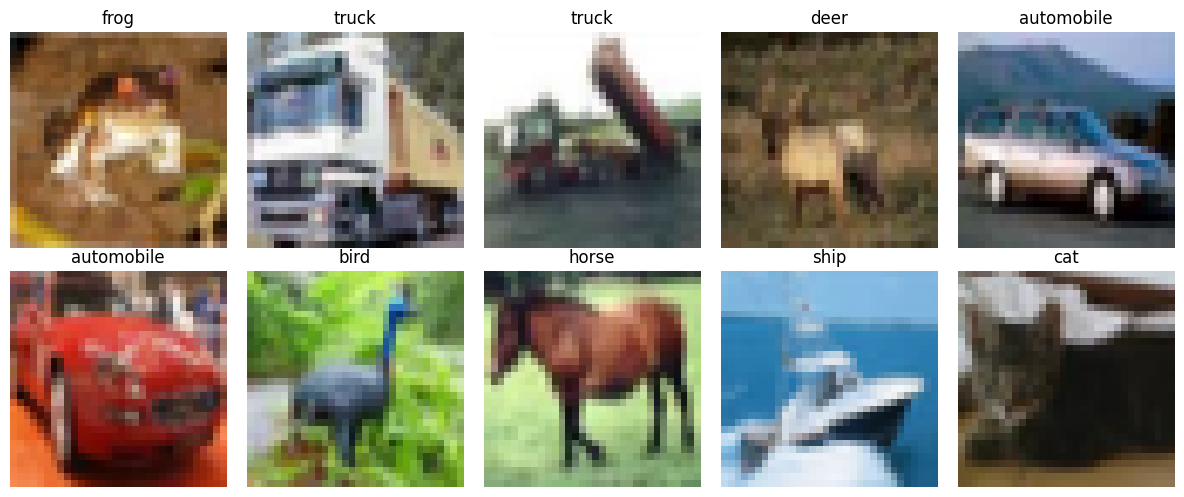

In [4]:
print("="*60)
print("DEMONSTRATION 1: The Linear Layer Failure")
print("="*60)

# Load CIFAR-10 dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

train_dataset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

print(f"CIFAR-10 Dataset:")
print(f"  Training samples: {len(train_dataset)}")
print(f"  Test samples: {len(test_dataset)}")
print(f"  Image shape: {train_dataset[0][0].shape}")
print(f"  Classes: {train_dataset.classes}")

# Show sample images
fig, axes = plt.subplots(2, 5, figsize=(12, 5))
for i in range(10):
    img, label = train_dataset[i]
    ax = axes[i//5, i%5]
    # Denormalize for display
    img_display = img * 0.5 + 0.5
    ax.imshow(img_display.permute(1, 2, 0))
    ax.set_title(train_dataset.classes[label])
    ax.axis('off')
plt.tight_layout()
plt.show()

## 🧠 What Gets Lost When We Flatten?

Let's visualize what happens when we flatten an image for a dense network:

**The Problem:**
- Images are **2D grids** where **spatial relationships matter**
- Pixel (5,10) is **above** pixel (6,10) → this relationship is lost when flattened
- **Local correlations** (pixels near each other are related) disappear

**Formal Claim:** Flattening destroys **spatial features** and **neighbor relationships** that are essential for vision.

WHAT GETS LOST WHEN WE FLATTEN?
Original image shape: torch.Size([3, 32, 32])
3 channels (RGB), 32 height, 32 width

Flattened shape: torch.Size([3072])
That's 3072 numbers in a line!


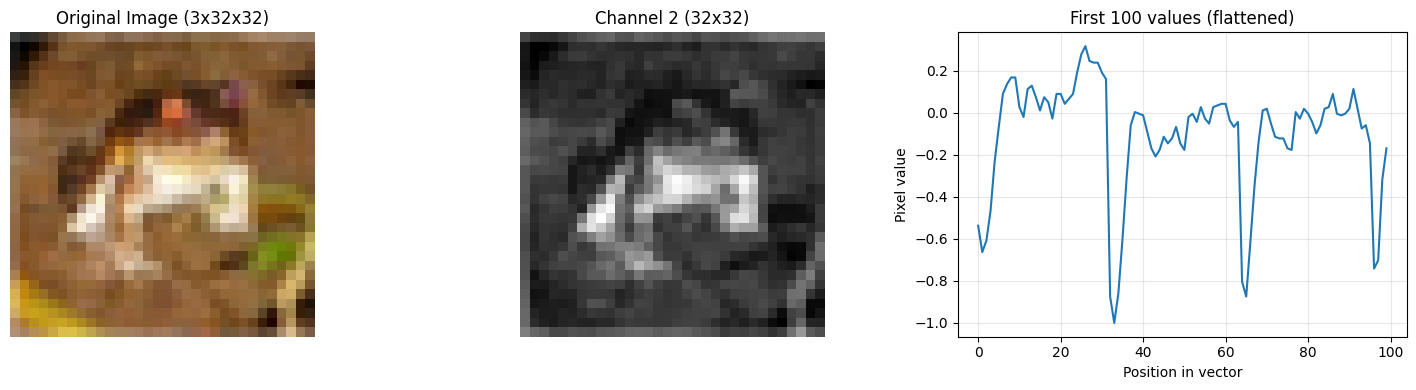


🧠 The Spatial Understanding Gap:
In the original image, pixel (5, 10) is ABOVE pixel (6, 10).
After flattening, these become positions 165 and 196 in a list.

🎯 Key Loss: The network loses all **spatial relationships** and **local correlations**!


In [5]:
print("="*60)
print("WHAT GETS LOST WHEN WE FLATTEN?")
print("="*60)

# Take one image
img, label = train_dataset[0]
print(f"Original image shape: {img.shape}")
print(f"3 channels (RGB), 32 height, 32 width")

# What dense networks see
flattened = img.view(-1)
print(f"\nFlattened shape: {flattened.shape}")
print(f"That's {flattened.shape[0]} numbers in a line!")

# Visualize the difference
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Original image
axes[0].imshow(img.permute(1, 2, 0) * 0.5 + 0.5)
axes[0].set_title("Original Image (3x32x32)")
axes[0].axis('off')

# Individual channels
for i in range(3):
    axes[1].imshow(img[i].numpy(), cmap='gray')
    axes[1].set_title(f"Channel {i} (32x32)")
    axes[1].axis('off')

# Flattened representation
axes[2].plot(flattened.numpy()[:100])
axes[2].set_title("First 100 values (flattened)")
axes[2].set_xlabel("Position in vector")
axes[2].set_ylabel("Pixel value")
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n🧠 The Spatial Understanding Gap:")
print("In the original image, pixel (5, 10) is ABOVE pixel (6, 10).")
print("After flattening, these become positions 165 and 196 in a list.")
print("\n🎯 Key Loss: The network loses all **spatial relationships** and **local correlations**!")

## 🛑 **STOP & THINK: Before We Train the Dense Network**

**Question:** What do you predict will happen?

1. **Accuracy Prediction:** What test accuracy do you think a dense network will get on CIFAR-10?
  - A) < 50%
  - B) 50-70% 
  - C) 70-85%
  - D) > 85%
  
2. **Training Speed:** Will it train faster or slower than CNNs we'll build later?
  - Why?
  
3. **Parameter Count:** How many parameters does this dense network have?
  - Quick estimate: 3072 × 512 + 512 × 256 + ...
  
**Write your predictions here, then run the cell:**
1. ______
2. ______  
3. ______

## 📉 Building a Dense Network for CIFAR-10

Let's see how poorly a dense network performs when we destroy spatial information.

In [6]:
class DenseNetCIFAR10(nn.Module):
    """Dense network for CIFAR-10 (This will perform poorly)"""
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(32*32*3, 512)  # Flatten 32x32x3 → 3072
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 128)
        self.fc4 = nn.Linear(128, 10)       # 10 classes
        self.dropout = nn.Dropout(0.3)
        
    def forward(self, x):
        # THE PROBLEM: Flattening destroys spatial info
        x = x.view(x.size(0), -1)  # Flatten!
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = F.relu(self.fc2(x))
        x = self.dropout(x)
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return x

# Create model
dense_model = DenseNetCIFAR10().to(device)

# Count parameters
total_params = sum(p.numel() for p in dense_model.parameters())
trainable_params = sum(p.numel() for p in dense_model.parameters() if p.requires_grad)

print(f"Dense Network Architecture:")
print(dense_model)
print(f"\nTotal parameters: {total_params:,}")
print(f"Trainable parameters: {trainable_params:,}")

# Training function (from Lecture 1)
def train_model(model, train_loader, test_loader, epochs=5, lr=0.001):
    """Standard training loop"""
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)
    
    train_losses, test_losses = [], []
    train_accs, test_accs = [], []
    
    for epoch in range(epochs):
        # Training
        model.train()
        running_loss, correct, total = 0.0, 0, 0
        
        for images, labels in tqdm(train_loader, desc=f"Epoch {epoch+1}/{epochs}"):
            images, labels = images.to(device), labels.to(device)
            
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            
            running_loss += loss.item()
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()
        
        train_loss = running_loss / len(train_loader)
        train_acc = 100. * correct / total
        train_losses.append(train_loss)
        train_accs.append(train_acc)
        
        # Testing
        model.eval()
        running_loss, correct, total = 0.0, 0, 0
        
        with torch.no_grad():
            for images, labels in test_loader:
                images, labels = images.to(device), labels.to(device)
                outputs = model(images)
                loss = criterion(outputs, labels)
                
                running_loss += loss.item()
                _, predicted = outputs.max(1)
                total += labels.size(0)
                correct += predicted.eq(labels).sum().item()
        
        test_loss = running_loss / len(test_loader)
        test_acc = 100. * correct / total
        test_losses.append(test_loss)
        test_accs.append(test_acc)
        
        print(f"  Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.2f}%")
        print(f"  Test Loss: {test_loss:.4f}, Test Acc: {test_acc:.2f}%")
    
    return train_losses, test_losses, train_accs, test_accs

# Create dataloaders (optimized from Lecture 2)
train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True, 
                          num_workers=2, pin_memory=True)
test_loader = DataLoader(test_dataset, batch_size=128, shuffle=False,
                         num_workers=2, pin_memory=True)

print("\n" + "="*60)
print("TRAINING DENSE NETWORK (This will be bad...)")
print("="*60)

# Train the dense network
dense_train_losses, dense_test_losses, dense_train_accs, dense_test_accs = train_model(
    dense_model, train_loader, test_loader, epochs=10, lr=0.001
)

print(f"\n🎯 Final Test Accuracy: {dense_test_accs[-1]:.2f}%")
print("\n💭 Reflection: Were your predictions correct? Why was the accuracy so low?")

Dense Network Architecture:
DenseNetCIFAR10(
  (fc1): Linear(in_features=3072, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=256, bias=True)
  (fc3): Linear(in_features=256, out_features=128, bias=True)
  (fc4): Linear(in_features=128, out_features=10, bias=True)
  (dropout): Dropout(p=0.3, inplace=False)
)

Total parameters: 1,738,890
Trainable parameters: 1,738,890

TRAINING DENSE NETWORK (This will be bad...)


Epoch 1/10: 100%|██████████| 391/391 [00:11<00:00, 34.69it/s]


  Train Loss: 1.7437, Train Acc: 37.56%
  Test Loss: 1.5441, Test Acc: 45.74%


Epoch 2/10: 100%|██████████| 391/391 [00:10<00:00, 35.99it/s]


  Train Loss: 1.5663, Train Acc: 44.52%
  Test Loss: 1.4547, Test Acc: 48.67%


Epoch 3/10: 100%|██████████| 391/391 [00:11<00:00, 34.76it/s]


  Train Loss: 1.4876, Train Acc: 47.81%
  Test Loss: 1.4231, Test Acc: 49.35%


Epoch 4/10: 100%|██████████| 391/391 [00:11<00:00, 34.57it/s]


  Train Loss: 1.4289, Train Acc: 49.82%
  Test Loss: 1.3931, Test Acc: 51.25%


Epoch 5/10: 100%|██████████| 391/391 [00:11<00:00, 35.01it/s]


  Train Loss: 1.3856, Train Acc: 50.99%
  Test Loss: 1.3760, Test Acc: 51.69%


Epoch 6/10: 100%|██████████| 391/391 [00:11<00:00, 34.73it/s]


  Train Loss: 1.3385, Train Acc: 52.79%
  Test Loss: 1.3576, Test Acc: 51.93%


Epoch 7/10: 100%|██████████| 391/391 [00:11<00:00, 34.99it/s]


  Train Loss: 1.3111, Train Acc: 53.53%
  Test Loss: 1.3357, Test Acc: 52.83%


Epoch 8/10: 100%|██████████| 391/391 [00:11<00:00, 34.65it/s]


  Train Loss: 1.2785, Train Acc: 54.73%
  Test Loss: 1.3111, Test Acc: 53.87%


Epoch 9/10: 100%|██████████| 391/391 [00:11<00:00, 35.24it/s]


  Train Loss: 1.2501, Train Acc: 55.64%
  Test Loss: 1.3111, Test Acc: 53.75%


Epoch 10/10: 100%|██████████| 391/391 [00:11<00:00, 35.04it/s]


  Train Loss: 1.2234, Train Acc: 56.62%
  Test Loss: 1.3040, Test Acc: 54.09%

🎯 Final Test Accuracy: 54.09%

💭 Reflection: Were your predictions correct? Why was the accuracy so low?


# 🧩 PART 2: Convolution Operations - Deep Intuition

## 3️⃣ Local Connectivity: The Core CNN Principle

**Why Local Connectivity Matters:**
- In dense networks, each neuron sees the **entire image**
- In CNNs, each neuron only sees a **small patch** (its receptive field)
- This matches biological vision: we process local information first

**Key Contrast:**

| Dense Networks | Convolutional Networks |
|----------------|------------------------|
| **Global view** - each neuron sees all pixels | **Local view** - each neuron sees small patch |
| **Unique weights** for each connection | **Shared weights** across spatial positions |
| No spatial understanding | Preserves spatial relationships |

> **Local connectivity** means CNN neurons focus on their neighborhood, not the whole image.

## 🎨 Kernel Visualization Library

Let's explore common convolution kernels used in image processing:

KERNEL VISUALIZATION LIBRARY
Test Image (9x9):
[[0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.5 0.5 0.5 0.5 0.5 0.  0. ]
 [0.  0.  0.5 1.  1.  1.  0.  0.  0. ]
 [0.  0.  0.5 1.  1.  1.  0.  0.  0. ]
 [0.  0.  0.5 1.  1.  1.  0.  0.  0. ]
 [0.  0.  0.5 0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0. ]]


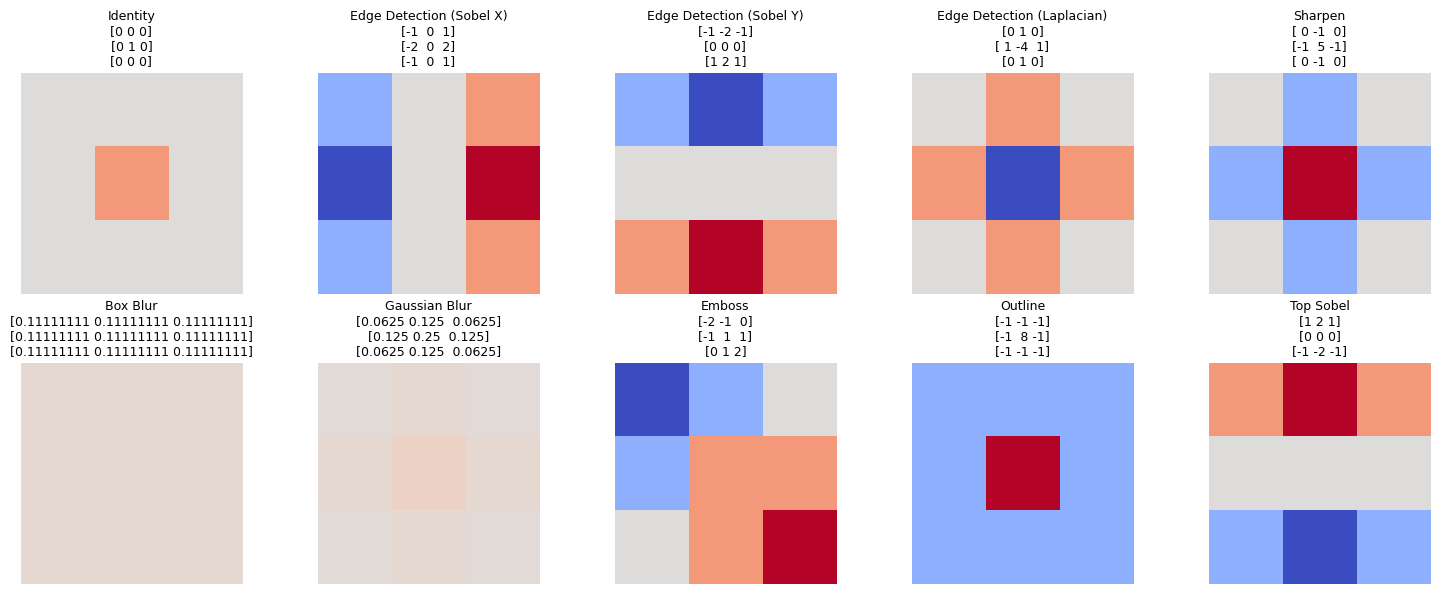


Applying kernels to test image:
--------------------------------------------------


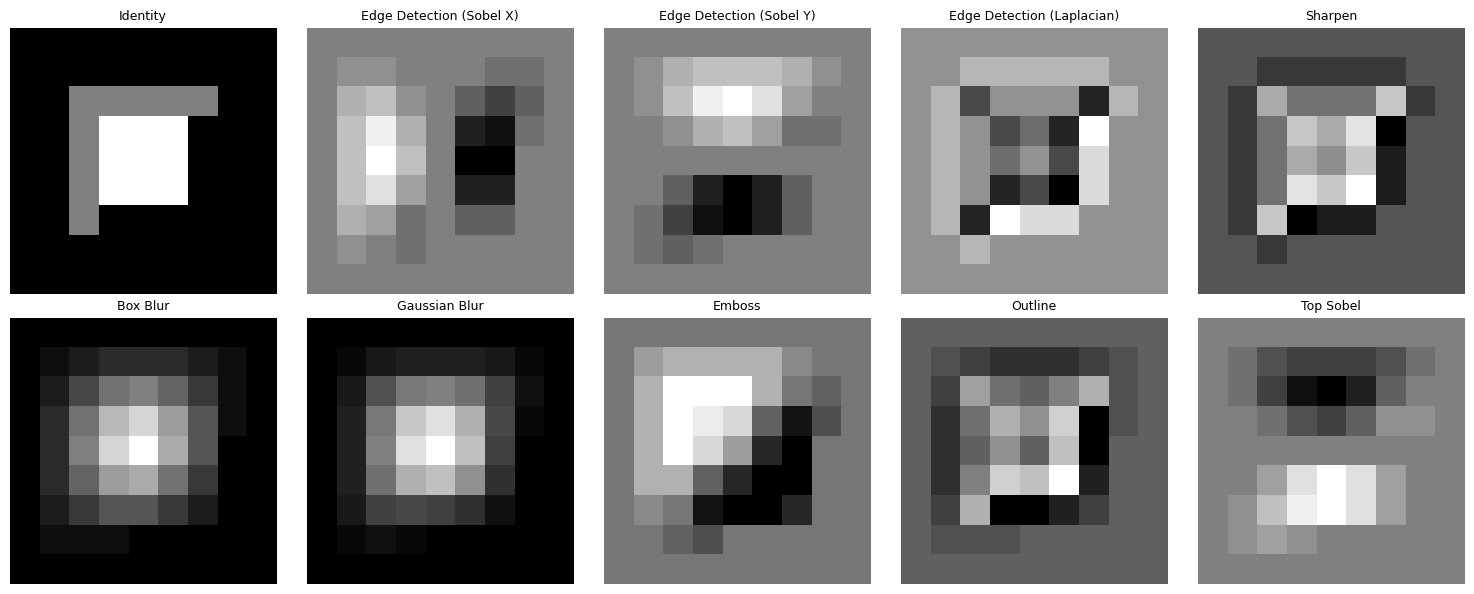


🧠 Kernel Interpretation Guide:
1. Edge Detectors: Look for intensity changes (positive & negative weights)
2. Blur Kernels: Average neighbors (all positive, sum to 1)
3. Sharpen Kernels: Enhance edges (center positive, neighbors negative)

🎯 Key Insight: CNN filters LEARN these patterns from data!


In [7]:
print("="*60)
print("KERNEL VISUALIZATION LIBRARY")
print("="*60)

# Create a library of common kernel patterns
KERNEL_LIBRARY = {
    'Identity': np.array([[0, 0, 0], [0, 1, 0], [0, 0, 0]]),
    'Edge Detection (Sobel X)': np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]),
    'Edge Detection (Sobel Y)': np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]]),
    'Edge Detection (Laplacian)': np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]]),
    'Sharpen': np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]]),
    'Box Blur': (1/9) * np.array([[1, 1, 1], [1, 1, 1], [1, 1, 1]]),
    'Gaussian Blur': (1/16) * np.array([[1, 2, 1], [2, 4, 2], [1, 2, 1]]),
    'Emboss': np.array([[-2, -1, 0], [-1, 1, 1], [0, 1, 2]]),
    'Outline': np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]]),
    'Top Sobel': np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]]),
}

# Create a test image
test_image = np.zeros((9, 9))
# Add some features
test_image[3:6, 3:6] = 1  # Bright square
test_image[2, 2:7] = 0.5  # Horizontal line
test_image[2:7, 2] = 0.5  # Vertical line

print("Test Image (9x9):")
print(test_image)

def apply_kernel_visualization(image, kernel_dict):
    """Apply and visualize multiple kernels"""
    num_kernels = len(kernel_dict)
    fig, axes = plt.subplots(2, 5, figsize=(15, 6))
    axes = axes.ravel()
    
    for idx, (name, kernel) in enumerate(kernel_dict.items()):
        # Apply convolution
        result = manual_convolution(image, kernel, padding=1)
        
        # Plot kernel
        axes[idx].imshow(kernel, cmap='coolwarm', vmin=-2, vmax=2)
        axes[idx].set_title(f"{name}\n{kernel[0]}\n{kernel[1]}\n{kernel[2]}", fontsize=9)
        axes[idx].axis('off')
        
        # Add result as text in subplot
        # axes[idx].text(0, -0.1, f"Result shape: {result.shape}", transform=axes[idx].transAxes, fontsize=8)
    
    plt.tight_layout()
    plt.show()
    
    # Show results separately
    print("\nApplying kernels to test image:")
    print("-" * 50)
    
    fig2, axes2 = plt.subplots(2, 5, figsize=(15, 6))
    axes2 = axes2.ravel()
    
    for idx, (name, kernel) in enumerate(kernel_dict.items()):
        result = manual_convolution(image, kernel, padding=1)
        axes2[idx].imshow(result, cmap='gray')
        axes2[idx].set_title(f"{name}", fontsize=9)
        axes2[idx].axis('off')
    
    plt.tight_layout()
    plt.show()

# Manual convolution function (redefined for clarity)
def manual_convolution(image, kernel, stride=1, padding=0):
    """Perform 2D convolution manually"""
    # Add padding if specified
    if padding > 0:
        image = np.pad(image, padding, mode='constant')
    
    # Get dimensions
    img_h, img_w = image.shape
    kernel_h, kernel_w = kernel.shape
    
    # Calculate output dimensions
    output_h = (img_h - kernel_h) // stride + 1
    output_w = (img_w - kernel_w) // stride + 1
    
    # Create output array
    output = np.zeros((output_h, output_w))
    
    # Perform convolution
    for i in range(0, output_h):
        for j in range(0, output_w):
            # Extract patch
            patch = image[i*stride:i*stride+kernel_h, j*stride:j*stride+kernel_w]
            # Element-wise multiplication and sum
            output[i, j] = np.sum(patch * kernel)
    
    return output

# Visualize all kernels
apply_kernel_visualization(test_image, KERNEL_LIBRARY)

print("\n🧠 Kernel Interpretation Guide:")
print("1. Edge Detectors: Look for intensity changes (positive & negative weights)")
print("2. Blur Kernels: Average neighbors (all positive, sum to 1)")
print("3. Sharpen Kernels: Enhance edges (center positive, neighbors negative)")
print("\n🎯 Key Insight: CNN filters LEARN these patterns from data!")

## 4️⃣ Manual Convolution: Building Intuition

## PyTorch Convolutions
Lets try using the PyTorch Convolution mechanic and just see what happens on a dummy image. We will create an image with 3 channels and have dimensions 128 pixels x 128 pixels. We will then create a few different convolutions to see what happens!\

In [8]:
# Create a Random Image
rand = torch.rand(3, 128, 128) 

### Baseline Convolution ###
conv1 = nn.Conv2d(in_channels=3,
                  out_channels=3,
                  kernel_size=3,
                  stride=1,
                  padding=0)

### Convolution With a Larger Kernel ###
conv2 = nn.Conv2d(in_channels=3,
                  out_channels=3,
                  kernel_size=7,
                  stride=1,
                  padding=0)

### Convolution With a Larger Stride ###
conv3 = nn.Conv2d(in_channels=3,
                  out_channels=3,
                  kernel_size=3,
                  stride=3,
                  padding=0)

### Convolutions with a Larger Padding ###
conv4 = nn.Conv2d(in_channels=3,
                  out_channels=3,
                  kernel_size=3,
                  stride=1,
                  padding=2)

### Convolutions with More Output Channels ###
conv5 = nn.Conv2d(in_channels=3,
                  out_channels=64,
                  kernel_size=3,
                  stride=1,
                  padding=0)


conv1_out = conv1(rand)
conv2_out = conv2(rand)
conv3_out = conv3(rand)
conv4_out = conv4(rand)
conv5_out = conv5(rand)

print("Baseline Output:", conv1_out.shape)
print("Larger Kernel Output:", conv2_out.shape)
print("Larger Stride Output:", conv3_out.shape)
print("Larger Padding Output:", conv4_out.shape)
print("More Ouput Channels Output:", conv5_out.shape)


Baseline Output: torch.Size([3, 126, 126])
Larger Kernel Output: torch.Size([3, 122, 122])
Larger Stride Output: torch.Size([3, 42, 42])
Larger Padding Output: torch.Size([3, 130, 130])
More Ouput Channels Output: torch.Size([64, 126, 126])


Lets note some of the properties we see here. First the default settings from PyTorch (a stride of 1 and padding of 0) keeps the same number of output channels as 3 but we have had some decrease in the image size now from 128 to 127. Lets list out how the other things impact it:

- **Larger Kernel Size:** Further decreases the output image size from 128 to 122
- **Larger Stride:** Significantly decreases the output image size from 128 to 42
- **Larger Padding:** Increases the output image size from 128 to 30
- **More Output Channels:** Keeps the same 126 shape output as our baseline but we now have 64 channels instead of 3

We can actually calculate the size of an image after a convolution is applied to it with a simple formula!

$$\frac{Width - KernelSize + 2*Padding}{Stride} + 1$$

In [9]:
# Create a Random Image
rand = torch.rand(3, 128, 128) 

conv1 = nn.Conv2d(in_channels=3,
                  out_channels=32, ### 32 Output Channels
                  kernel_size=7,
                  stride=2,
                  padding=1)

conv2 = nn.Conv2d(in_channels=32,
                  out_channels=64, ### 32 Input Channels
                  kernel_size=3,
                  stride=1,
                  padding=0)

output = conv2(conv1(rand))

print("Stacked Convolution Shape:", output.shape)

Stacked Convolution Shape: torch.Size([64, 60, 60])


We were able to stack convolutions together! Notice that we have a lot of channels now and have considerable downsized the images from 128 down to 60 here. But there is a few other things we need to talk about before we make our first Convolutional Neural Network. 

## 🎯 Parameter Sharing: The Efficiency Secret

**What is Parameter Sharing?**
- One filter = one set of weights
- The same filter is **reused across all spatial positions**
- This leads to **translation equivariance**: an edge is an edge anywhere in the image

**Why It Matters:**
- Drastically reduces parameters (vs dense networks)
- Matches our intuition: edge detectors work everywhere
- Makes CNNs efficient for images

# 🔧 PART 9: Convolution is Just Matrix Multiplication!

## 8️⃣ Im2Col: The Efficiency Secret

**The Implementation Reality:**
- The sliding window visualization is intuitive but **inefficient**
- Real implementations use **Im2Col** algorithm
- Convolution becomes: **constrained linear layer applied repeatedly to local patches**

**Key Insight:**
> Convolution is just a specialized form of matrix multiplication that respects spatial structure.

We were able to stack convolutions together! Notice that we have a lot of channels now and have considerable downsized the images from 128 down to 60 here. But there is a few other things we need to talk about before we make our first Convolutional Neural Network.

## Convolutions are just Matrix Multiplication!

An important thing to point out is, although we saw what convolutions are previously, where we slide a window across the image and do a multiply-accumulate operation (dot product), this visual is not how it is implemented due to efficiency. We have super fast and parallelized implementations of the matrix multiplication (take a look at [this implementation](https://siboehm.com/articles/22/CUDA-MMM) to see how we have optimized CUDA Kernels for matrix multiplication), so if we can convert our convolution problem to a matrix multiplication problem, it would be perfect! To do this, we use an algorithm called **Im2Col**, or in PyTorch its called [nn.Unfold](https://pytorch.org/docs/stable/generated/torch.nn.Unfold.html).

### Im2Col (nn.Unfold)

![image](https://github.com/priyammaz/PyTorch-Adventures/blob/main/src/visuals/im2col.gif?raw=true)
[credit](https://hackmd.io/@machine-learning/blog-post-cnnumpy-fast)

In the example here, we see that we have 3 input channels (RGB) and then our kernel is a 2x2 filter. Therefore, our effective filter for this operation has 12 values (3 channels * 2 filter height * 2 filter width). If we have a stride of 1, then we have 9 possible patches in total for our image (which is of size 4 x 4). Therefore, we use Im2Col, and create a 12 (kernel size) x 9 (patches) matrix, that just copied the cooresponding values from our original image. 

Now that we have a 12 x 9 matrix, we can transpose it to be a 9 x 12 matrix and have a linear layer with 12 inputs (our number of learnable parameters in our single filter) and 1 output, which will effectively do our dot product to produce a 9 x 1 matrix. This 9 x 1 matrix can then be reshaped to a 3x3 matrix creating our final result in the convolution!

### What if we have multiple output channels?
Well in this case, all we have to do is take our linear layer with 12 inputs, and just have the number of channels we want as an output! Lets say we wanted 64 output channels, then we have a linear layer with 12 inputs and 64 outputs. Then when we pass in our 9 x 12 matrix, it will output a 9 x 64. We can transpose this to a 64 x 9, and then reshape to a 64 x 3 x 3 (channels x height x width) which is our typical shape for images. 

Lets quickly implement an example of what this looks like in PyTorch!

### Implementing Conv2d

In [10]:
print("="*60)
print("IMPLEMENTING CONV2D FROM SCRATCH (Im2Col)")
print("="*60)

class MyConv2d(nn.Module):
    """Custom Conv2d implementation using Im2Col algorithm"""
    def __init__(self, in_channels, out_channels, kernel_size, stride=1, padding=0):
        super().__init__()
        
        self.kernel_size = kernel_size
        self.stride = stride
        self.padding = padding
        self.in_channels = in_channels
        self.out_channels = out_channels
        
        # Define the weights of the convolution as a Linear layer
        # This shows the connection: Conv2d = Linear applied to patches
        self.linear = nn.Linear(in_channels * kernel_size * kernel_size, out_channels, bias=True)
        
    def forward(self, x):
        # Batch size, number of channels, height, width
        batch_size, channels, height, width = x.size()
        
        # Ensure input channels match
        assert channels == self.in_channels, "Input channels mismatch"
        
        # Unfold the input into patches (Im2Col operation)
        # Shape: [batch_size, in_channels * kernel_size * kernel_size, num_patches]
        patches = nn.functional.unfold(
            x, 
            kernel_size=self.kernel_size, 
            stride=self.stride, 
            padding=self.padding
        ) 

        # Store the number of kernel coefficients and patches
        _, num_kernel_coefficients, num_patches = patches.shape
        
        # Transpose patches to shape [batch_size * num_patches, in_channels * kernel_size * kernel_size]
        patches = patches.transpose(1, 2).reshape(-1, num_kernel_coefficients)

        # Apply the linear layer to perform convolution
        conv_output = self.linear(patches)  # Shape: [batch_size * num_patches, out_channels]
        
        # Reshape back to [batch_size, out_channels, num_patches]
        conv_output = conv_output.view(batch_size, self.out_channels, -1).transpose(1, 2)

        # Fold the patches back into image dimensions
        output_height = (height + 2 * self.padding - self.kernel_size) // self.stride + 1
        output_width = (width + 2 * self.padding - self.kernel_size) // self.stride + 1
        
        output = conv_output.transpose(1, 2).view(batch_size, self.out_channels, output_height, output_width)
        
        return output

# Compare our implementation with PyTorch's
myconv = MyConv2d(in_channels=3, out_channels=64, kernel_size=7, stride=1, padding=0)
torchconv = nn.Conv2d(in_channels=3, out_channels=64, kernel_size=7, stride=1, padding=0)

# Create a random tensor
rand = torch.randn(4, 3, 128, 128)

myconv_out = myconv(rand)
torchconv_out = torchconv(rand)

print("Output of My Convolution:",  myconv_out.shape)
print("Output of PyTorch Convolution:", torchconv_out.shape)

# Check if outputs are similar
similarity = torch.corrcoef(torch.stack([myconv_out.flatten(), torchconv_out.flatten()]))[0, 1]
print(f"\nCorrelation between implementations: {similarity:.4f}")

print("\n🧠 Key Interpretation:")
print("1. Im2Col unfolds image into patches")
print("2. Linear layer processes each patch")
print("3. Results are folded back into image format")
print("\n🎯 Fundamental Insight:")
print("   Convolution = constrained linear layer applied repeatedly to local patches")

IMPLEMENTING CONV2D FROM SCRATCH (Im2Col)
Output of My Convolution: torch.Size([4, 64, 122, 122])
Output of PyTorch Convolution: torch.Size([4, 64, 122, 122])

Correlation between implementations: -0.0002

🧠 Key Interpretation:
1. Im2Col unfolds image into patches
2. Linear layer processes each patch
3. Results are folded back into image format

🎯 Fundamental Insight:
   Convolution = constrained linear layer applied repeatedly to local patches


## 🧪 **QUICK CHECK: Test Your Convolution Understanding**

**Scenario:** Input image is 10×10, kernel is 3×3, stride=2, padding=0

1. **Output size calculation:**
  ```
  output = (10 - 3)/2 + 1 = ?
  ```

2. **Number of positions:** How many times will the kernel be applied?

3. **Parameter sharing:** If we have 16 output channels, how many total parameters?
  - Hint: Each 3×3 kernel has 9 weights + 1 bias = 10 parameters

<details>
<summary>📝 Click to check answers</summary>

**Answers:**
1. **Output size:** (10-3)/2 + 1 = 4 → 4×4 output
2. **Positions:** 4×4 = 16 positions (stride=2 means we skip every other position)
3. **Parameters:** 16 channels × (3×3 weights + 1 bias) = 16 × 10 = 160 parameters

**Key Insight:** Compare to dense layer: A dense layer from 100 pixels to 16 neurons would need 100×16 = 1600 parameters! CNNs are 10× more efficient here.
</details>

# 🧱 PART 3: CNN Building Blocks 

<table style="width:100%; table-layout:fixed;">
  <tr>
    <td><img width="150px" src="https://raw.githubusercontent.com/vdumoulin/conv_arithmetic/master/gif/no_padding_no_strides.gif"></td>
    <td><img width="150px" src="https://raw.githubusercontent.com/vdumoulin/conv_arithmetic/master/gif/same_padding_no_strides.gif"></td>
    <td><img width="150px" src="https://raw.githubusercontent.com/vdumoulin/conv_arithmetic/master/gif/full_padding_no_strides.gif"></td>
  </tr>
  <tr>
    <td>No padding, no strides</td>
    <td>Arbitrary padding, no strides</td>
    <td>Half padding, no strides</td>
  </tr>
  <tr>
    <td><img width="150px" src="https://raw.githubusercontent.com/vdumoulin/conv_arithmetic/master/gif/no_padding_strides.gif"></td>
    <td><img width="150px" src="https://raw.githubusercontent.com/vdumoulin/conv_arithmetic/master/gif/padding_strides.gif"></td>
    <td><img width="150px" src="https://raw.githubusercontent.com/vdumoulin/conv_arithmetic/master/gif/padding_strides_odd.gif"></td>
  </tr>
  <tr>
    <td>No padding, strides</td>
    <td>Padding, strides</td>
    <td>Padding, strides (odd)</td>
  </tr>
</table>

## 🎯 PyTorch Convolution Parameters Explained

Let's explore the key parameters in `nn.Conv2d`:

In [11]:
print("="*60)
print("PYTORCH CONV2D: PARAMETER EXPLORATION")
print("="*60)

# Create a sample image batch
batch_size = 2
channels = 3
height = 32
width = 32

sample_input = torch.randn(batch_size, channels, height, width)
print(f"Input shape: {sample_input.shape}")
print(f"Batch: {batch_size}, Channels: {channels}, Height: {height}, Width: {width}")

# Helper function to show output shapes
def test_conv_params(in_channels, out_channels, kernel_size, stride, padding):
    """Test convolution with different parameters"""
    conv = nn.Conv2d(in_channels, out_channels, kernel_size, stride=stride, padding=padding)
    output = conv(sample_input)
    
    # Calculate expected shape
    out_h = (height + 2*padding - kernel_size) // stride + 1
    out_w = (width + 2*padding - kernel_size) // stride + 1
    
    print(f"  Kernel: {kernel_size}, Stride: {stride}, Padding: {padding}")
    print(f"  Expected: ({batch_size}, {out_channels}, {out_h}, {out_w})")
    print(f"  Actual:   {tuple(output.shape)}")
    print(f"  {'✓' if output.shape == (batch_size, out_channels, out_h, out_w) else '✗'}")
    print()

print("\n1. Changing kernel_size:")
test_conv_params(3, 16, kernel_size=3, stride=1, padding=0)
test_conv_params(3, 16, kernel_size=5, stride=1, padding=0)
test_conv_params(3, 16, kernel_size=7, stride=1, padding=0)

print("\n2. Changing stride:")
test_conv_params(3, 16, kernel_size=3, stride=1, padding=0)
test_conv_params(3, 16, kernel_size=3, stride=2, padding=0)
test_conv_params(3, 16, kernel_size=3, stride=3, padding=0)

print("\n3. Changing padding:")
test_conv_params(3, 16, kernel_size=3, stride=1, padding=0)
test_conv_params(3, 16, kernel_size=3, stride=1, padding=1)
test_conv_params(3, 16, kernel_size=3, stride=1, padding=2)

print("\n4. Changing output channels:")
test_conv_params(3, 8, kernel_size=3, stride=1, padding=1)
test_conv_params(3, 16, kernel_size=3, stride=1, padding=1)
test_conv_params(3, 32, kernel_size=3, stride=1, padding=1)

print("\n🧠 Mental Model: What each parameter does")
print("• kernel_size: How big of an area to look at (receptive field)")
print("• stride: How far to move after each look (downsampling)")
print("• padding: Add borders to preserve size or handle edges")
print("• out_channels: Number of different features to learn")
print("\n📐 Output size formula:")
print("  Height = (Input_Height + 2*Padding - Kernel) / Stride + 1")
print("  Width = (Input_Width + 2*Padding - Kernel) / Stride + 1")

PYTORCH CONV2D: PARAMETER EXPLORATION
Input shape: torch.Size([2, 3, 32, 32])
Batch: 2, Channels: 3, Height: 32, Width: 32

1. Changing kernel_size:
  Kernel: 3, Stride: 1, Padding: 0
  Expected: (2, 16, 30, 30)
  Actual:   (2, 16, 30, 30)
  ✓

  Kernel: 5, Stride: 1, Padding: 0
  Expected: (2, 16, 28, 28)
  Actual:   (2, 16, 28, 28)
  ✓

  Kernel: 7, Stride: 1, Padding: 0
  Expected: (2, 16, 26, 26)
  Actual:   (2, 16, 26, 26)
  ✓


2. Changing stride:
  Kernel: 3, Stride: 1, Padding: 0
  Expected: (2, 16, 30, 30)
  Actual:   (2, 16, 30, 30)
  ✓

  Kernel: 3, Stride: 2, Padding: 0
  Expected: (2, 16, 15, 15)
  Actual:   (2, 16, 15, 15)
  ✓

  Kernel: 3, Stride: 3, Padding: 0
  Expected: (2, 16, 10, 10)
  Actual:   (2, 16, 10, 10)
  ✓


3. Changing padding:
  Kernel: 3, Stride: 1, Padding: 0
  Expected: (2, 16, 30, 30)
  Actual:   (2, 16, 30, 30)
  ✓

  Kernel: 3, Stride: 1, Padding: 1
  Expected: (2, 16, 32, 32)
  Actual:   (2, 16, 32, 32)
  ✓

  Kernel: 3, Stride: 1, Padding: 2
  Exp

## 🔬 **EXPERIMENT ZONE: Play with CNN Parameters**

**Try changing these values and observe the effects:**

In [12]:
def build_custom_cnn(in_channels=3, out_channels=16, kernel_size=3, stride=1, padding=1, pool_kernel=2):
    """Build a custom CNN with your parameters"""
    layers = []
    
    # Convolution layer
    conv = nn.Conv2d(in_channels, out_channels, kernel_size=kernel_size, 
                     stride=stride, padding=padding)
    layers.append(conv)
    
    # BatchNorm
    layers.append(nn.BatchNorm2d(out_channels))
    
    # ReLU
    layers.append(nn.ReLU())
    
    # Pooling
    if pool_kernel > 1:
        layers.append(nn.MaxPool2d(pool_kernel))
    
    model = nn.Sequential(*layers)
    
    # Test it
    test_input = torch.randn(2, in_channels, 32, 32)
    output = model(test_input)
    
    print(f"🔧 Your CNN Configuration:")
    print(f"  Input: {test_input.shape}")
    print(f"  Conv: {in_channels}→{out_channels}, kernel={kernel_size}, stride={stride}, pad={padding}")
    print(f"  Pool: {'Yes' if pool_kernel>1 else 'No'} (kernel={pool_kernel})")
    print(f"  Output: {output.shape}")
    print(f"  Parameters: {sum(p.numel() for p in model.parameters()):,}")
    
    return model, output.shape

print("🎮 Try These Experiments:\n")
print("1. Change kernel size:")
build_custom_cnn(kernel_size=5)
print()
print("2. Change stride:")
build_custom_cnn(stride=2)
print()
print("3. Remove pooling:")
build_custom_cnn(pool_kernel=1)

print("\n💡 Question: What happens to the output shape with each change?")

🎮 Try These Experiments:

1. Change kernel size:
🔧 Your CNN Configuration:
  Input: torch.Size([2, 3, 32, 32])
  Conv: 3→16, kernel=5, stride=1, pad=1
  Pool: Yes (kernel=2)
  Output: torch.Size([2, 16, 15, 15])
  Parameters: 1,248

2. Change stride:
🔧 Your CNN Configuration:
  Input: torch.Size([2, 3, 32, 32])
  Conv: 3→16, kernel=3, stride=2, pad=1
  Pool: Yes (kernel=2)
  Output: torch.Size([2, 16, 8, 8])
  Parameters: 480

3. Remove pooling:
🔧 Your CNN Configuration:
  Input: torch.Size([2, 3, 32, 32])
  Conv: 3→16, kernel=3, stride=1, pad=1
  Pool: No (kernel=1)
  Output: torch.Size([2, 16, 32, 32])
  Parameters: 480

💡 Question: What happens to the output shape with each change?


## 5️⃣ Receptive Fields: How CNNs See More

**The Hierarchy of Understanding:**
```
Raw Pixels
    ↓
Convolution 1 → Small patches (edges, corners)
    ↓
Convolution 2 → Larger patterns (textures, shapes)
    ↓
Convolution 3+ → Complex structures (object parts)
    ↓
Full Image Understanding
```

**Key Insight:** Each layer builds on the previous:
- **Early layers**: Small receptive fields → see local features (edges)
- **Middle layers**: Medium receptive fields → see patterns (textures)
- **Late layers**: Large receptive fields → see complex structures (objects)

> Deeper CNNs don't just get more complex—they literally see more of the image through increasing receptive fields.

## 🧱 The Complete Toolkit for CNN Architectures

Now let's understand all the components that make up modern CNNs.

## Pooling
Convolutions are expensive computations, so downscaling of our images or outputs of convolutions would greatly help reduce the number of dimensions! To do this we will use Pooling layers. The function identically to Convolutions except there is no parameters to learn. Instead of doing the sum of the product of weights of the filter and pixel values like we saw previously, we can do two other things:

- **Average Pooling:** This is just a simple average of the pixels covered by the filter as our output for that specific location
- **Max Pooling:** Even less computation as we just take the maximum value of the pixels covered by the filter

The inputs are very similar to the Convolution function, but there is no channels anymore. The reason is, we will take the average/max at every iteration for every channel. Therefore we will maintain the same number of channels in our output, but will downsize the overall dimension of the image. Lets take a quick look at the functions!

```
torch.nn.AvgPool2d(kernel_size, stride=None, padding=0)
torch.nn.MaxPool2d(kernel_size, stride=None, padding=0)

```
Another thing to keep in mind! As you can see above the stride is None. This is because, by default, the stride will be the same as the kernel size. This will essentially do pooling with non-overlapping intervals. If your filter size is 3, then you will do an average/max at that [3x3] patch of pixels, and then move over 3 pixels, therefore having no overlap. We can make the stride less than our kernel size to reduce the amount of downsampling we are doing. 


Lets take a look at the pooling function!

In [13]:
# Create a Random Image
rand = torch.rand(3, 128, 128) 

### Average Pool Where Stride == Kernel_Size ###
avgpool = nn.AvgPool2d(kernel_size=3)

### Average Pool Where We Decrease Stride ###
avgpool_2 = nn.AvgPool2d(kernel_size=3, stride=2)


out_1 = avgpool(rand)
out_2 = avgpool_2(rand)

print("Kernel Size == Stride", out_1.shape)
print("Reduced Stride to 2", out_2.shape)

Kernel Size == Stride torch.Size([3, 42, 42])
Reduced Stride to 2 torch.Size([3, 63, 63])


Again, just as we saw before, the pooling with a smaller stride had less downsampling! 

### Adaptive Pooling

There is one other function that is very helpful and this is **Adaptive Pooling**. In regular pooling, we set ahead of time the kernel size and stride. In Adaptive Pooling, we set the output size we want and it will figure out the kernel size and stride for us! 

In [14]:
# Create a Random Image
rand = torch.rand(3, 128, 128) 

adaptiveavgpool_1 = nn.AdaptiveAvgPool2d((64,64)) # Output with size 64 x 64
adaptiveavgpool_2 = nn.AdaptiveAvgPool2d((1,1))   # Output with size 1 x 1 
adaptiveavgpool_3 = nn.AdaptiveAvgPool2d((32,64)) # Output with size 32 x 64

out_1 = adaptiveavgpool_1(rand)
out_2 = adaptiveavgpool_2(rand)
out_3 = adaptiveavgpool_3(rand)

print("Avg Pool 1:", out_1.shape)
print("Avg Pool 2:", out_2.shape)
print("Avg Pool 3:", out_3.shape)

Avg Pool 1: torch.Size([3, 64, 64])
Avg Pool 2: torch.Size([3, 1, 1])
Avg Pool 3: torch.Size([3, 32, 64])


## Batch Normalization

Batch Normalization is also an extremely important aspect of Deep Learning that was introduced after AlexNet. Although this was not a part of the official implementation of AlexNet we will add it in anyway!

The idea of Batch Norm is very simple! We talked about this previously and you should have seen these values in our [DataLoader Tutorial](https://github.com/priyammaz/PyTorch-Adventures/tree/main/PyTorch%20Basics/PyTorch%20DataLoaders) that we breifly explained:

```
transforms.Normalize(mean=[0.485,0.456,0.406], std=[0.229,0.224,0.225])
```

When we process the data in our transforms, we will pre-normalize them. What these values above describe are the mean and standard deviation across pixel values in ImageNet for each channel (RGB), therefore are probably good values to use for tasks similar to ImageNet. If you have a completely different dataset then you can calculate this for your usecase. Normalization is important as it improves our ability to optimize these high dimensional spaces efficiently. 

But we have a problem! Sure the input data was normalized, but the second we do any nonlinear calculation on it (Linear layers and convolutions with activation functions) there is no guarantee that the output remains normalized. Therefore, before we pass the tensor to the next layer, we will do Batch Normalization to normalize our data throughout!

![Batchnorm](https://github.com/priyammaz/PyTorch-Adventures/blob/main/src/visuals/dl_normalizations.png?raw=true)

What Batch normalization does is it calculates the Mean and Standard Deviation across all the samples (Dimension N) and then uses that to normalize the current batch. During training BatchNorm keeps a running tally of the mean and standard deviations is calculates over many random batches and aggregates them so it can estimate the true Mean and Standard deviation to use during prediction.

```
nn.BatchNorm2d(num_features)
```

The only input BatchNorm needs is, for computer vision type tensors, the number of channels it should expect!


## Dropout

Again, overfitting is a strong concern for Deep Learning as these models have very large expressive capacities. There are a few things we can do though to try to help called **Dropout**. Dropout is essentially randomly turning off different nodes in a neural network. 

![dropout](https://github.com/priyammaz/PyTorch-Adventures/blob/main/src/visuals/dropout.png?raw=true)

[credit](https://medium.com/@amarbudhiraja/https-medium-com-amarbudhiraja-learning-less-to-learn-better-dropout-in-deep-machine-learning-74334da4bfc5)

In every forward/backward pass, a neuron can be turned off with some probability, meaning the model, during training, has less parameters to help it learn. By reducing this, we are also making the flexiblity of any single forward pass less while pushing the overall generalization of the model

```
nn.Dropout(p=0.5)
```


## 6️⃣ Channels = Feature Types: What CNNs Learn

**The Channel Hierarchy:**
- **Early layers (few channels)**: Basic features
  - Edges, corners, color blobs
  - Each channel responds to a different simple pattern
  
- **Middle layers (more channels)**: Complex patterns
  - Textures, combinations of edges
  - More specialized feature detectors
  
- **Late layers (many channels)**: Semantic features
  - Object parts, complex shapes
  - High-level representations

**Visual Analogy:**
Think of channels as **specialized experts**:
- Channel 1: "I'm an edge detector"
- Channel 2: "I look for circles"
- Channel 3: "I detect red regions"
- ... and so on

**Key Insight:** Each channel learns to respond to a different type of visual feature, creating a rich representation of the image.

# 🏗️ PART 4: CNN Architecture Comparison Dashboard

Let's compare different CNN architectures to understand design trade-offs:

CNN ARCHITECTURE COMPARISON DASHBOARD
Benchmarking different CNN architectures...



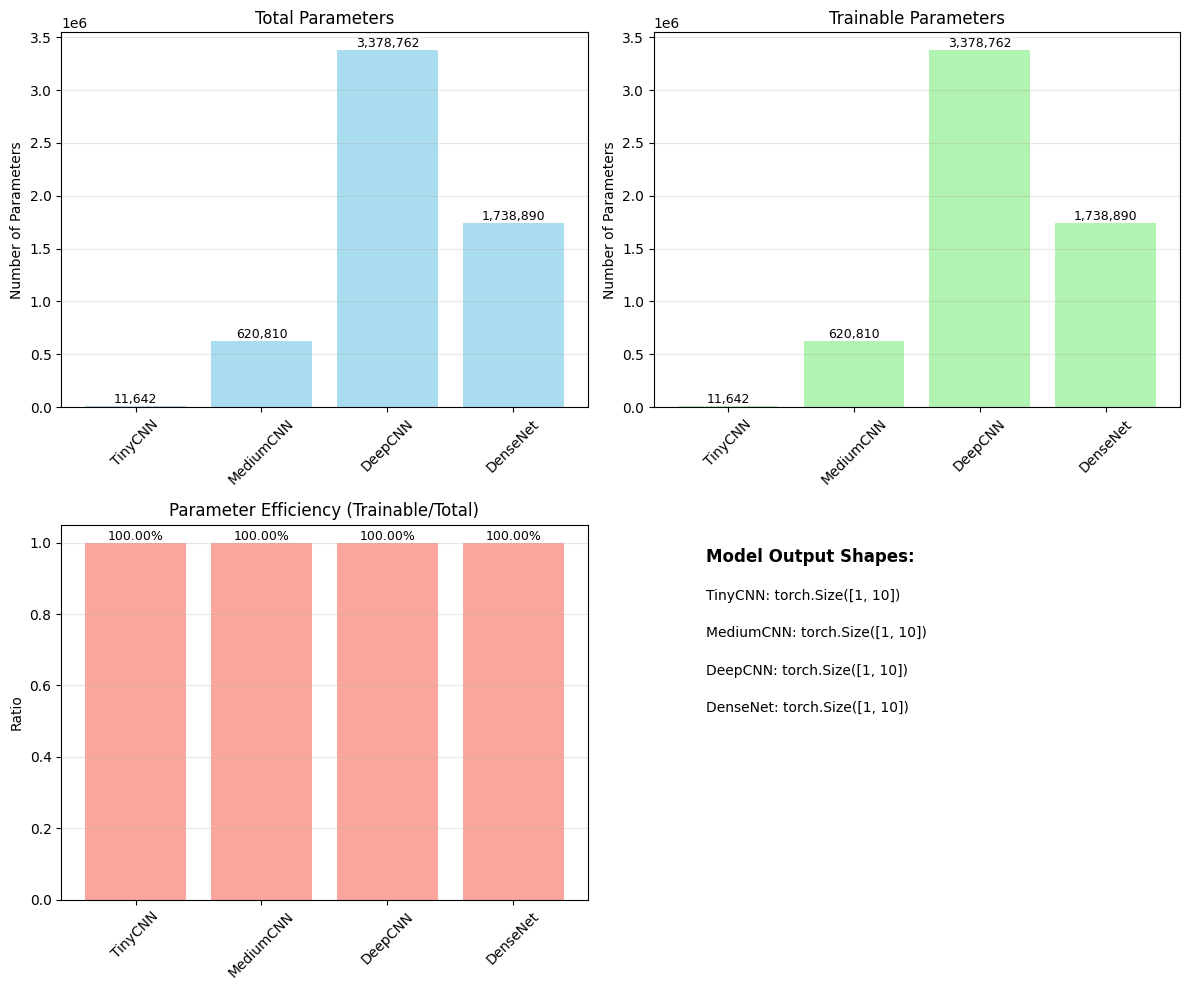


📊 Summary Table:
Model                Total Params    Trainable Params   Output Shape        
--------------------------------------------------------------------------------
TinyCNN              11,642          11,642             torch.Size([1, 10]) 
MediumCNN            620,810         620,810            torch.Size([1, 10]) 
DeepCNN              3,378,762       3,378,762          torch.Size([1, 10]) 
DenseNet             1,738,890       1,738,890          torch.Size([1, 10]) 

🎯 Architecture Trade-offs:
1. TinyCNN: Few parameters, fast training, but limited capacity
2. MediumCNN: Good balance of capacity and efficiency
3. DeepCNN: High capacity, better accuracy, but slower training
4. DenseNet: Many parameters, inefficient for images

💡 Rule of thumb: Start with MediumCNN, then go deeper if needed!


In [15]:
print("="*60)
print("CNN ARCHITECTURE COMPARISON DASHBOARD")
print("="*60)

class CNNBenchmark:
    """Compare different CNN architectures"""
    
    def __init__(self):
        self.results = {}
        
    def benchmark(self, model_class, model_name, **kwargs):
        """Benchmark a model"""
        start_time = time.time()
        
        # Create model
        model = model_class(**kwargs).to(device)
        
        # Calculate stats
        params = sum(p.numel() for p in model.parameters())
        trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
        
        # Estimate memory usage
        input_tensor = torch.randn(1, 3, 32, 32).to(device)
        with torch.no_grad():
            output = model(input_tensor)
        
        # Store results
        self.results[model_name] = {
            'params': params,
            'trainable_params': trainable_params,
            'output_shape': output.shape,
            'model': model,
            'architecture': str(model.__class__.__name__)
        }
        
        return self.results[model_name]
    
    def plot_comparison(self):
        """Plot comparison of all benchmarked models"""
        if not self.results:
            print("No models to compare!")
            return
        
        names = list(self.results.keys())
        params = [self.results[n]['params'] for n in names]
        trainable_params = [self.results[n]['trainable_params'] for n in names]
        
        fig, axes = plt.subplots(2, 2, figsize=(12, 10))
        
        # Bar chart: Total parameters
        axes[0, 0].bar(names, params, color='skyblue', alpha=0.7)
        axes[0, 0].set_title('Total Parameters')
        axes[0, 0].set_ylabel('Number of Parameters')
        axes[0, 0].tick_params(axis='x', rotation=45)
        axes[0, 0].grid(True, alpha=0.3, axis='y')
        
        # Add value labels
        for i, v in enumerate(params):
            axes[0, 0].text(i, v, f'{v:,}', ha='center', va='bottom', fontsize=9)
        
        # Bar chart: Trainable parameters
        axes[0, 1].bar(names, trainable_params, color='lightgreen', alpha=0.7)
        axes[0, 1].set_title('Trainable Parameters')
        axes[0, 1].set_ylabel('Number of Parameters')
        axes[0, 1].tick_params(axis='x', rotation=45)
        axes[0, 1].grid(True, alpha=0.3, axis='y')
        
        # Add value labels
        for i, v in enumerate(trainable_params):
            axes[0, 1].text(i, v, f'{v:,}', ha='center', va='bottom', fontsize=9)
        
        # Efficiency comparison
        efficiency = [trainable_params[i]/params[i] for i in range(len(names))]
        axes[1, 0].bar(names, efficiency, color='salmon', alpha=0.7)
        axes[1, 0].set_title('Parameter Efficiency (Trainable/Total)')
        axes[1, 0].set_ylabel('Ratio')
        axes[1, 0].tick_params(axis='x', rotation=45)
        axes[1, 0].grid(True, alpha=0.3, axis='y')
        
        # Add value labels
        for i, v in enumerate(efficiency):
            axes[1, 0].text(i, v, f'{v:.2%}', ha='center', va='bottom', fontsize=9)
        
        # Output shapes
        output_shapes = [str(self.results[n]['output_shape']) for n in names]
        axes[1, 1].axis('off')
        axes[1, 1].text(0.1, 0.9, 'Model Output Shapes:', fontsize=12, fontweight='bold')
        for i, (name, shape) in enumerate(zip(names, output_shapes)):
            axes[1, 1].text(0.1, 0.8 - i*0.1, f'{name}: {shape}', fontsize=10)
        
        plt.tight_layout()
        plt.show()
        
        # Print summary table
        print("\n📊 Summary Table:")
        print("="*80)
        print(f"{'Model':<20} {'Total Params':<15} {'Trainable Params':<18} {'Output Shape':<20}")
        print("-"*80)
        for name in names:
            result = self.results[name]
            print(f"{name:<20} {result['params']:<15,} {result['trainable_params']:<18,} {str(result['output_shape']):<20}")
        print("="*80)

# Define different CNN architectures
class TinyCNN(nn.Module):
    """Very small CNN for comparison"""
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 8, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2)
        self.conv2 = nn.Conv2d(8, 16, kernel_size=3, padding=1)
        self.fc = nn.Linear(16 * 8 * 8, 10)
        
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))  # 32x32 → 16x16
        x = self.pool(F.relu(self.conv2(x)))  # 16x16 → 8x8
        x = x.view(x.size(0), -1)
        x = self.fc(x)
        return x

class MediumCNN(nn.Module):
    """Medium-sized CNN"""
    def __init__(self):
        super().__init__()
        self.conv_layers = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(2),
            
            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(2),
            
            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.MaxPool2d(2),
        )
        self.fc_layers = nn.Sequential(
            nn.Flatten(),
            nn.Linear(128 * 4 * 4, 256),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(256, 10)
        )
        
    def forward(self, x):
        x = self.conv_layers(x)
        x = self.fc_layers(x)
        return x

class DeepCNN(nn.Module):
    """Deep CNN with many layers"""
    def __init__(self):
        super().__init__()
        self.conv_layers = nn.Sequential(
            # Block 1
            nn.Conv2d(3, 64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.Conv2d(64, 64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(2),
            
            # Block 2
            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.Conv2d(128, 128, kernel_size=3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.MaxPool2d(2),
            
            # Block 3
            nn.Conv2d(128, 256, kernel_size=3, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.MaxPool2d(2),
        )
        self.fc_layers = nn.Sequential(
            nn.Flatten(),
            nn.Linear(256 * 4 * 4, 512),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(256, 10)
        )
        
    def forward(self, x):
        x = self.conv_layers(x)
        x = self.fc_layers(x)
        return x

# Create benchmark
benchmark = CNNBenchmark()

# Benchmark different architectures
print("Benchmarking different CNN architectures...\n")

benchmark.benchmark(TinyCNN, "TinyCNN")
benchmark.benchmark(MediumCNN, "MediumCNN")
benchmark.benchmark(DeepCNN, "DeepCNN")

# Dense network for comparison
benchmark.benchmark(DenseNetCIFAR10, "DenseNet")

# Plot comparison
benchmark.plot_comparison()

print("\n🎯 Architecture Trade-offs:")
print("1. TinyCNN: Few parameters, fast training, but limited capacity")
print("2. MediumCNN: Good balance of capacity and efficiency")
print("3. DeepCNN: High capacity, better accuracy, but slower training")
print("4. DenseNet: Many parameters, inefficient for images")
print("\n💡 Rule of thumb: Start with MediumCNN, then go deeper if needed!")

# 🏗️ PART 5: Building a CNN model from Scratch

## 🏗️ SimpleCNN: Your First Complete CNN Architecture

Let's build a simple but effective CNN for CIFAR-10.

In [16]:
print("="*60)
print("BUILDING SIMPLECNN: STEP BY STEP")
print("="*60)

class SimpleCNN(nn.Module):
    """A simple CNN for CIFAR-10 classification"""
    def __init__(self):
        super().__init__()
        
        # Feature extractor (convolutional layers)
        self.conv_layers = nn.Sequential(
            # Layer 1: Extract basic features (edges, colors)
            nn.Conv2d(3, 32, kernel_size=3, padding=1),  # 32x32x3 → 32x32x32
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(2),  # 32x32x32 → 16x16x32
            
            # Layer 2: Extract more complex patterns
            nn.Conv2d(32, 64, kernel_size=3, padding=1),  # 16x16x32 → 16x16x64
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(2),  # 16x16x64 → 8x8x64
            
            # Layer 3: Extract high-level features
            nn.Conv2d(64, 128, kernel_size=3, padding=1),  # 8x8x64 → 8x8x128
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.MaxPool2d(2),  # 8x8x128 → 4x4x128
        )
        
        # Classifier (fully connected layers)
        self.fc_layers = nn.Sequential(
            nn.Flatten(),  # 4x4x128 = 2048 features
            nn.Linear(128 * 4 * 4, 256),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(128, 10)  # 10 classes for CIFAR-10
        )
    
    def forward(self, x):
        x = self.conv_layers(x)
        x = self.fc_layers(x)
        return x

# Create and analyze the model
simple_cnn = SimpleCNN().to(device)

print("\nModel Architecture:")
print(simple_cnn)

# Count parameters
total_params = sum(p.numel() for p in simple_cnn.parameters())
trainable_params = sum(p.numel() for p in simple_cnn.parameters() if p.requires_grad)

print(f"\nTotal parameters: {total_params:,}")
print(f"Trainable parameters: {trainable_params:,}")

# Compare with dense network
print(f"\nComparison with Dense Network:")
print(f"  SimpleCNN: {trainable_params:,} parameters")
print(f"  DenseNet:  {sum(p.numel() for p in dense_model.parameters() if p.requires_grad):,} parameters")
print(f"  CNN has {sum(p.numel() for p in dense_model.parameters() if p.requires_grad)/trainable_params:.1f}x fewer parameters!")

# Test the forward pass
print("\n" + "="*60)
print("TESTING FORWARD PASS")
print("="*60)

# Create a test batch
test_batch = torch.randn(4, 3, 32, 32).to(device)
output = simple_cnn(test_batch)
print(f"Input shape: {test_batch.shape}")
print(f"Output shape: {output.shape}")
print(f"Expected: (batch_size=4, num_classes=10)")
print("\n✅ Forward pass works correctly!")

BUILDING SIMPLECNN: STEP BY STEP

Model Architecture:
SimpleCNN(
  (conv_layers): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (5): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU()
    (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (8): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): ReLU()
    (11): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc_layers): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=2048, out_

## 🎨 Visualizing What CNNs Learn

Let's look inside our CNN to understand what each layer is detecting.

Instead of treating the model as a black box, we **tap into the intermediate convolutional layers** and visualize their feature maps. This helps us see *how* the network gradually transforms raw pixels into meaningful visual concepts.

### 🔍 Technique Overview

We use **forward hooks** in PyTorch to capture the outputs of convolutional layers during a forward pass. Each output tensor represents a set of **feature maps**, where:

- Each **channel** corresponds to a different learned filter
- Bright regions indicate **strong activations**
- Dark regions indicate **weak or no response**

### 🪝 Forward Hooks (Core Idea)

A *forward hook* allows us to intercept the output of a layer **without modifying the model**.  
This is ideal for model inspection and debugging.

```python
layer.register_forward_hook(hook_fn)


In [17]:
def visualize_cnn_feature_maps(
    model,
    dataset,
    device,
    sample_index=0,
    conv_container_attr="conv_layers",
    max_maps=8,
    cmap="viridis"
):
    """
    Visualize feature maps from convolutional layers of a CNN.

    Args:
        model (nn.Module): Trained CNN model
        dataset (torch.utils.data.Dataset): Dataset to sample from
        device (torch.device): CPU or CUDA
        sample_index (int): Index of sample image from dataset
        conv_container_attr (str): Attribute name holding conv layers
        max_maps (int): Max feature maps to show per layer
        cmap (str): Matplotlib colormap
    """

    print("=" * 60)
    print("VISUALIZING CNN FEATURE MAPS")
    print("=" * 60)

    model.eval()
    feature_maps = {}
    hooks = []

    # Hook function
    def get_features(name):
        def hook(_, __, output):
            feature_maps[name] = output.detach()
        return hook

    # Register hooks
    conv_container = getattr(model, conv_container_attr, None)
    if conv_container is None:
        raise AttributeError(f"Model has no attribute '{conv_container_attr}'")

    for name, layer in conv_container.named_children():
        if isinstance(layer, nn.Conv2d):
            hooks.append(layer.register_forward_hook(get_features(name)))

    # Load sample image
    image, label = dataset[sample_index]
    image = image.unsqueeze(0).to(device)

    # Forward pass
    with torch.no_grad():
        output = model(image)
        prediction = output.argmax(dim=1).item()

    # Remove hooks
    for hook in hooks:
        hook.remove()

    # Print results
    print(f"Sample image label : {dataset.classes[label]}")
    print(f"Model prediction  : {dataset.classes[prediction]}")
    print(f"{'✓ Correct' if prediction == label else '✗ Incorrect'}")

    print("\nFeature maps from each convolutional layer:")

    num_layers = len(feature_maps)
    fig, axes = plt.subplots(
        num_layers, max_maps,
        figsize=(2 * max_maps, 3 * num_layers)
    )

    if num_layers == 1:
        axes = axes.reshape(1, -1)

    for i, (layer_name, features) in enumerate(feature_maps.items()):
        channels = features.shape[1]
        num_maps = min(max_maps, channels)

        for j in range(num_maps):
            ax = axes[i, j]
            fmap = features[0, j].cpu().numpy()

            # Normalize
            fmap = (fmap - fmap.min()) / (fmap.max() - fmap.min() + 1e-8)

            ax.imshow(fmap, cmap=cmap)
            ax.axis("off")

            if j == 0:
                ax.set_title(f"{layer_name}\n({channels} channels)")

        # Hide unused axes
        for j in range(num_maps, max_maps):
            axes[i, j].axis("off")

    plt.tight_layout()
    plt.show()

    print("\n🧠 What you're seeing:")
    print("1. Early layers  → edges, blobs, color contrasts")
    print("2. Middle layers → textures and shapes")
    print("3. Deep layers   → abstract, semantic patterns")
    print("\n🎯 Key Insight: Each channel acts as a specialized feature detector.")


# Now lets apply the function to capture feature maps from specific layers
```

VISUALIZING CNN FEATURE MAPS
Sample image label : cat
Model prediction  : dog
✗ Incorrect

Feature maps from each convolutional layer:


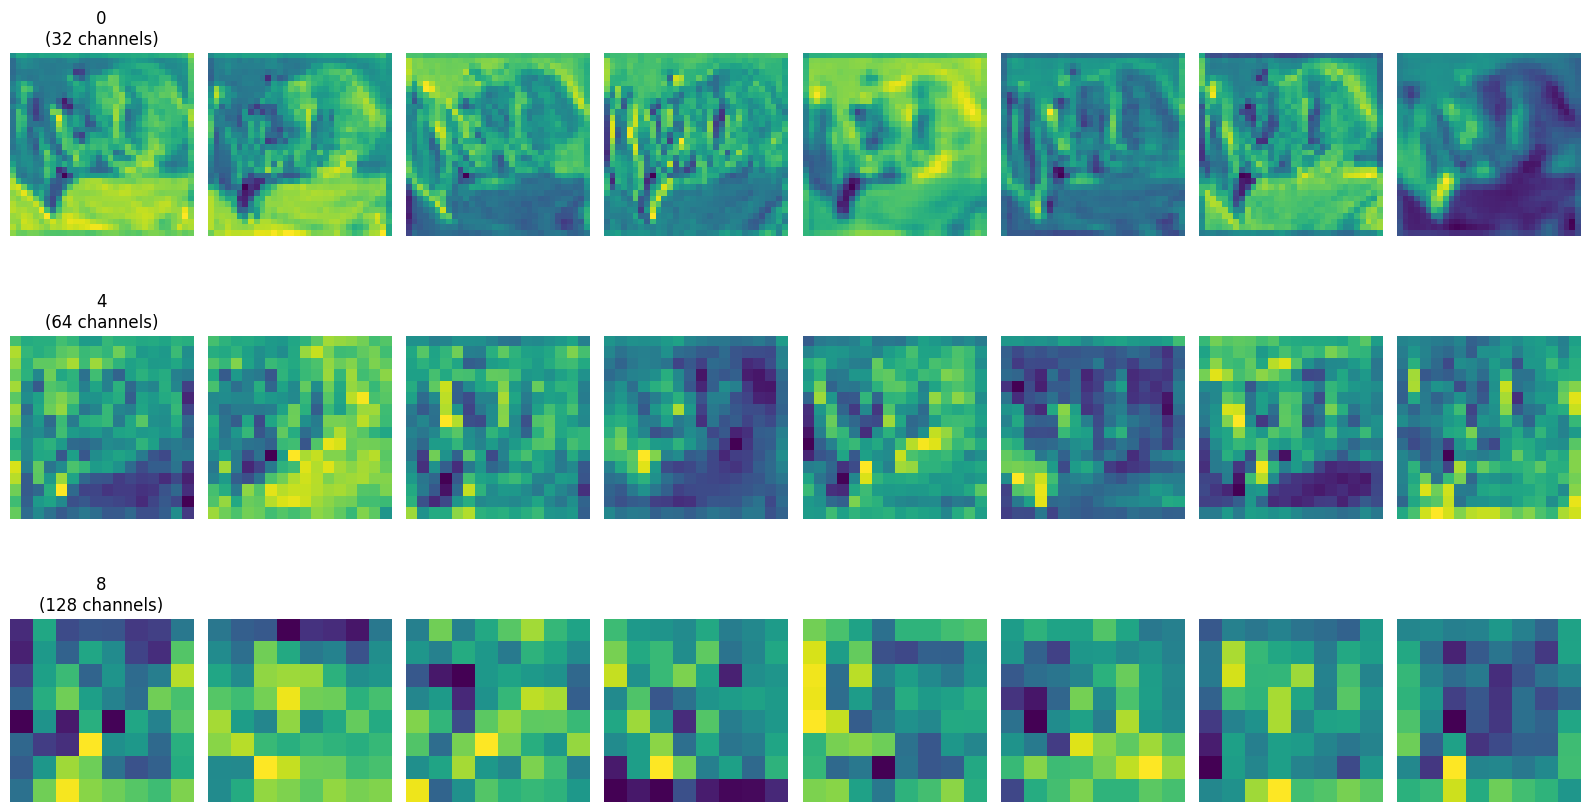


🧠 What you're seeing:
1. Early layers  → edges, blobs, color contrasts
2. Middle layers → textures and shapes
3. Deep layers   → abstract, semantic patterns

🎯 Key Insight: Each channel acts as a specialized feature detector.


In [18]:
visualize_cnn_feature_maps(
    model=simple_cnn,
    dataset=test_dataset,
    device=device,
    sample_index=0
)


## 🧠 **MENTAL MODEL CHECKPOINT: SimpleCNN**

**You should now visualize:**

1. **Information Flow:**
  ```
  Image (32×32×3) 
    → [Conv→BN→ReLU→Pool] × 3 
    → Flatten (2048 features)
    → [Linear→ReLU→Dropout] × 2
    → Output (10 classes)
  ```

2. **Feature Evolution:**
  - **Layer 1:** Basic edges, color blobs (32 channels)
  - **Layer 2:** Textures, patterns (64 channels)  
  - **Layer 3:** Object parts, complex shapes (128 channels)

3. **Spatial Reduction:**
  - Start: 32×32 (1024 spatial positions)
  - After pool1: 16×16 (256 positions)
  - After pool2: 8×8 (64 positions)
  - After pool3: 4×4 (16 positions)

**Self-check:** Can you draw this architecture on paper without looking?

**If unsure, re-run the visualization cell and trace the shapes!**

# 🏛️ PART 6: AlexNet - The 2012 Revolution

## 📜 Historical Context

**The 2012 Breakthrough:**
- **AlexNet** won ImageNet 2012 with **15.3% error** (previous best: 26.2%)
- Key innovations: **ReLU**, **Dropout**, **GPU training** (2x GTX 580)
- Impact: Started the **deep learning revolution** in computer vision

**Design Template:**
AlexNet established the pattern for modern CNNs:
```
Conv → ReLU → Pool → Repeat
Increasing channels
Decreasing spatial size
Flatten → Dense layers → Classification
```

> AlexNet showed that **depth matters** and **architectural choices matter**.

## 🌍 **REAL-WORLD CONNECTION: Why AlexNet Still Matters**

**Even though AlexNet is "old" (2012), its design patterns are EVERYWHERE:**

### 🏥 Medical Imaging Today:
```
Modern CNN for X-rays:
[Conv→BN→ReLU→Pool] × N  ← Sound familiar?
Flatten → Classify (Pneumonia/Healthy)
```

### 📱 Your Phone's Camera:
- Portrait mode = CNN detecting faces
- Night mode = CNN processing low-light
- Scene detection = CNN classifying (beach, food, document)

### 🚗 Autonomous Vehicles:
- Lane detection = CNN finding edges (like our manual example!)
- Object detection = CNN finding cars/pedestrians

**Key Insight:** AlexNet established the **template** that's still used today!

**Your Takeaway:** When you build `SimpleCNN`, you're using the same fundamental patterns as billion-dollar AI systems.

## 🏛️ Recreating the Model That Started It All

Now let's build AlexNet, adapted for CIFAR-10 (32x32 images).

In [19]:
import torch
import torch.nn as nn

class AlexNet(nn.Module):
    def __init__(self, classes=10, dropout_p=0.5):
        super().__init__()
        
        self.feature_extractor = nn.Sequential(
            # 32x32 → 32x32
            nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),  # 32 → 16
            nn.BatchNorm2d(64),

            # 16x16 → 16x16
            nn.Conv2d(64, 192, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),  # 16 → 8
            nn.BatchNorm2d(192),

            # 8x8 → 8x8
            nn.Conv2d(192, 384, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.BatchNorm2d(384),

            nn.Conv2d(384, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.BatchNorm2d(256),

            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),  # 8 → 4
            nn.BatchNorm2d(256),
        )

        self.head = nn.Sequential(
            nn.Dropout(dropout_p),
            nn.Linear(256 * 4 * 4, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(dropout_p),
            nn.Linear(4096, 4096),
            nn.ReLU(inplace=True),
            nn.Linear(4096, classes),
        )

    def forward(self, x):
        x = self.feature_extractor(x)
        x = torch.flatten(x, 1)
        x = self.head(x)
        return x


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = AlexNet(classes=10).to(device)

x = torch.randn(4, 3, 32, 32).to(device)
y = model(x)

print("Input shape :", x.shape)
print("Output shape:", y.shape)

print(model)


Input shape : torch.Size([4, 3, 32, 32])
Output shape: torch.Size([4, 10])
AlexNet(
  (feature_extractor): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (4): Conv2d(64, 192, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (5): ReLU(inplace=True)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): BatchNorm2d(192, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): BatchNorm2d(384, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (12): ReLU(inplace=True)
    (13): BatchNorm2d(256

# 🔧 PART 7: Training & Diagnostics

## 1️⃣3️⃣ Training Loop: Diagnostic Hooks

**What to Watch For:**

| Pattern | What It Means | Solution |
|---------|---------------|----------|
| **Train accuracy ↑, Val accuracy ↓** | **Overfitting** - Model memorizes training data | Add dropout, data augmentation, regularization |
| **Both train and val accuracy low** | **Underfitting** - Model not complex enough | Increase model size, train longer, check learning rate |
| **Loss not decreasing** | **Learning rate wrong** or **gradient issues** | Adjust learning rate, check initialization |
| **Accuracy plateau** | **Model capacity reached** | Try deeper architecture |

**Diagnostic Thinking:**
1. Always compare **training vs validation** curves
2. Look for the **gap** between them
3. Monitor **loss smoothness** (should decrease smoothly)
4. Watch for **sudden jumps or plateaus**

In [20]:

# ------------------------------
# Training function
# ------------------------------
def train_cnn_with_diagnostics(model, train_loader, test_loader, epochs=20, lr=5e-4):
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)
    scheduler = optim.lr_scheduler.ReduceLROnPlateau(
        optimizer, mode="max", patience=2, factor=0.5
    )

    train_accs, test_accs = [], []

    print("=" * 60)
    print("TRAINING ALEXNET ON CIFAR-10")
    print("=" * 60)

    for epoch in range(epochs):
        # -------- Train --------
        model.train()
        correct, total, running_loss = 0, 0, 0.0

        pbar = tqdm(train_loader, desc=f"Epoch {epoch+1}/{epochs} [Train]")
        for images, labels in pbar:
            images, labels = images.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            _, preds = outputs.max(1)
            total += labels.size(0)
            correct += preds.eq(labels).sum().item()

            pbar.set_postfix(
                Loss=f"{loss.item():.3f}",
                Acc=f"{100.0 * correct / total:.2f}%"
            )

        train_acc = 100.0 * correct / total
        train_accs.append(train_acc)

        # -------- Test --------
        model.eval()
        correct, total = 0, 0

        with torch.no_grad():
            pbar = tqdm(test_loader, desc=f"Epoch {epoch+1}/{epochs} [Test]")
            for images, labels in pbar:
                images, labels = images.to(device), labels.to(device)
                outputs = model(images)

                _, preds = outputs.max(1)
                total += labels.size(0)
                correct += preds.eq(labels).sum().item()

                pbar.set_postfix(
                    Acc=f"{100.0 * correct / total:.2f}%"
                )

        test_acc = 100.0 * correct / total
        test_accs.append(test_acc)

        scheduler.step(test_acc)

        gap = train_acc - test_acc
        warning = ""
        if gap > 15:
            warning = " ⚠️ Overfitting"
        elif train_acc < 60 and test_acc < 50:
            warning = " ⚠️ Underfitting"

        print(
            f"Epoch {epoch+1:02d} | "
            f"Train Acc: {train_acc:5.2f}% | "
            f"Test Acc: {test_acc:5.2f}% | "
            f"Gap: {gap:4.1f}%{warning}"
        )

    return train_accs, test_accs




In [21]:
# ------------------------------
# CIFAR-10 Dataloaders
# ------------------------------
train_transform = transforms.Compose([
    transforms.RandomCrop(32, padding=4),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=(0.4914, 0.4822, 0.4465),
        std=(0.2470, 0.2435, 0.2616)
    ),
])

test_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(
        mean=(0.4914, 0.4822, 0.4465),
        std=(0.2470, 0.2435, 0.2616)
    ),
])

train_dataset = datasets.CIFAR10(root="./data", train=True, download=True, transform=train_transform)
test_dataset = datasets.CIFAR10(root="./data", train=False, download=True, transform=test_transform)

train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True, num_workers=2, pin_memory=True)
test_loader = DataLoader(test_dataset, batch_size=128, shuffle=False, num_workers=2, pin_memory=True)

# ------------------------------
# Train
# ------------------------------
model = AlexNet(classes=10).to(device)

train_accs, test_accs = train_cnn_with_diagnostics(
    model,
    train_loader,
    test_loader,
    epochs=20,
    lr=5e-4
)

print(f"\n🎯 Final Test Accuracy: {test_accs[-1]:.2f}%")

TRAINING ALEXNET ON CIFAR-10


Epoch 1/20 [Test]: 100%|██████████| 79/79 [00:02<00:00, 33.62it/s, Acc=61.99%]


Epoch 01 | Train Acc: 50.51% | Test Acc: 61.99% | Gap: -11.5%


Epoch 2/20 [Test]: 100%|██████████| 79/79 [00:02<00:00, 33.95it/s, Acc=72.16%]


Epoch 02 | Train Acc: 65.82% | Test Acc: 72.16% | Gap: -6.3%


Epoch 3/20 [Test]: 100%|██████████| 79/79 [00:03<00:00, 25.33it/s, Acc=75.88%]


Epoch 03 | Train Acc: 71.64% | Test Acc: 75.88% | Gap: -4.2%


Epoch 4/20 [Test]: 100%|██████████| 79/79 [00:02<00:00, 28.91it/s, Acc=78.48%]


Epoch 04 | Train Acc: 75.66% | Test Acc: 78.48% | Gap: -2.8%


Epoch 5/20 [Test]: 100%|██████████| 79/79 [00:02<00:00, 33.54it/s, Acc=81.82%]


Epoch 05 | Train Acc: 78.82% | Test Acc: 81.82% | Gap: -3.0%


Epoch 6/20 [Test]: 100%|██████████| 79/79 [00:02<00:00, 33.98it/s, Acc=82.04%]


Epoch 06 | Train Acc: 81.30% | Test Acc: 82.04% | Gap: -0.7%


Epoch 7/20 [Test]: 100%|██████████| 79/79 [00:02<00:00, 34.37it/s, Acc=83.60%]


Epoch 07 | Train Acc: 82.73% | Test Acc: 83.60% | Gap: -0.9%


Epoch 8/20 [Test]: 100%|██████████| 79/79 [00:02<00:00, 34.80it/s, Acc=84.81%]


Epoch 08 | Train Acc: 84.32% | Test Acc: 84.81% | Gap: -0.5%


Epoch 9/20 [Test]: 100%|██████████| 79/79 [00:02<00:00, 28.07it/s, Acc=85.27%]


Epoch 09 | Train Acc: 85.57% | Test Acc: 85.27% | Gap:  0.3%


Epoch 10/20 [Test]: 100%|██████████| 79/79 [00:02<00:00, 26.89it/s, Acc=85.26%]


Epoch 10 | Train Acc: 86.40% | Test Acc: 85.26% | Gap:  1.1%


Epoch 11/20 [Test]: 100%|██████████| 79/79 [00:02<00:00, 33.71it/s, Acc=86.12%]


Epoch 11 | Train Acc: 87.40% | Test Acc: 86.12% | Gap:  1.3%


Epoch 12/20 [Test]: 100%|██████████| 79/79 [00:02<00:00, 34.05it/s, Acc=86.24%]


Epoch 12 | Train Acc: 88.15% | Test Acc: 86.24% | Gap:  1.9%


Epoch 13/20 [Test]: 100%|██████████| 79/79 [00:02<00:00, 34.21it/s, Acc=87.15%]


Epoch 13 | Train Acc: 89.17% | Test Acc: 87.15% | Gap:  2.0%


Epoch 14/20 [Test]: 100%|██████████| 79/79 [00:02<00:00, 33.35it/s, Acc=86.70%]


Epoch 14 | Train Acc: 89.63% | Test Acc: 86.70% | Gap:  2.9%


Epoch 15/20 [Test]: 100%|██████████| 79/79 [00:02<00:00, 29.09it/s, Acc=86.79%]


Epoch 15 | Train Acc: 90.06% | Test Acc: 86.79% | Gap:  3.3%


Epoch 16/20 [Test]: 100%|██████████| 79/79 [00:03<00:00, 24.77it/s, Acc=86.95%]


Epoch 16 | Train Acc: 90.73% | Test Acc: 86.95% | Gap:  3.8%


Epoch 17/20 [Test]: 100%|██████████| 79/79 [00:02<00:00, 33.91it/s, Acc=89.26%]


Epoch 17 | Train Acc: 92.97% | Test Acc: 89.26% | Gap:  3.7%


Epoch 18/20 [Test]: 100%|██████████| 79/79 [00:02<00:00, 33.82it/s, Acc=89.13%]


Epoch 18 | Train Acc: 93.78% | Test Acc: 89.13% | Gap:  4.7%


Epoch 19/20 [Test]: 100%|██████████| 79/79 [00:02<00:00, 33.82it/s, Acc=88.98%]


Epoch 19 | Train Acc: 94.10% | Test Acc: 88.98% | Gap:  5.1%


Epoch 20/20 [Test]: 100%|██████████| 79/79 [00:02<00:00, 34.01it/s, Acc=88.79%]

Epoch 20 | Train Acc: 94.52% | Test Acc: 88.79% | Gap:  5.7%

🎯 Final Test Accuracy: 88.79%


# 🌐 PART 8: Beyond 2D - The Convolution Family

## 🌐 Convolutions for Different Data Types

Convolutions aren't just for images! Let's explore Conv1D and Conv3D.

In [22]:
print("="*60)
print("BEYOND 2D: THE CONVOLUTION FAMILY")
print("="*60)

# Create sample data for each dimension
print("\n1. Conv1D: For sequential data (time series, text, audio)")
# Sample: (batch_size, channels, length)
data_1d = torch.randn(4, 3, 100)  # 4 samples, 3 channels (features), 100 time steps
conv1d = nn.Conv1d(in_channels=3, out_channels=16, kernel_size=5, stride=1)
output_1d = conv1d(data_1d)
print(f"   Input shape: {data_1d.shape}")
print(f"   Conv1d(3→16, kernel=5): {output_1d.shape}")
print(f"   Applications: Time series forecasting, audio processing, text")

print("\n2. Conv2D: For images (what we've been using)")
data_2d = torch.randn(4, 3, 32, 32)
conv2d = nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3, stride=1, padding=1)
output_2d = conv2d(data_2d)
print(f"   Input shape: {data_2d.shape}")
print(f"   Conv2d(3→16, kernel=3): {output_2d.shape}")
print(f"   Applications: Image classification, object detection")

print("\n3. Conv3D: For volumetric data")
data_3d = torch.randn(4, 3, 16, 16, 16)  # 4 samples, 3 channels, 16x16x16 volume
conv3d = nn.Conv3d(in_channels=3, out_channels=16, kernel_size=3, stride=1, padding=1)
output_3d = conv3d(data_3d)
print(f"   Input shape: {data_3d.shape}")
print(f"   Conv3d(3→16, kernel=3): {output_3d.shape}")
print(f"   Applications: Video analysis, medical imaging (CT, MRI)")

print("\n4. Transposed Convolution (Deconvolution): For upsampling")
conv_transpose = nn.ConvTranspose2d(in_channels=16, out_channels=8, kernel_size=3, stride=2, padding=1)
output_transpose = conv_transpose(output_2d)
print(f"   Input shape: {output_2d.shape}")
print(f"   ConvTranspose2d(16→8, kernel=3, stride=2): {output_transpose.shape}")
print(f"   Applications: Image segmentation, GANs, super-resolution")

print("\n🧠 Mental Model: Same Idea, Different Dimensions")
print("• Conv1D: Sliding window along TIME (audio) or SEQUENCE (text)")
print("• Conv2D: Sliding window across WIDTH and HEIGHT (images)")
print("• Conv3D: Sliding window through DEPTH, HEIGHT, and WIDTH (volumes)")
print("\n🎯 Key Insight: The mathematical operation is identical, just with different dimensions!")

BEYOND 2D: THE CONVOLUTION FAMILY

1. Conv1D: For sequential data (time series, text, audio)
   Input shape: torch.Size([4, 3, 100])
   Conv1d(3→16, kernel=5): torch.Size([4, 16, 96])
   Applications: Time series forecasting, audio processing, text

2. Conv2D: For images (what we've been using)
   Input shape: torch.Size([4, 3, 32, 32])
   Conv2d(3→16, kernel=3): torch.Size([4, 16, 32, 32])
   Applications: Image classification, object detection

3. Conv3D: For volumetric data
   Input shape: torch.Size([4, 3, 16, 16, 16])
   Conv3d(3→16, kernel=3): torch.Size([4, 16, 16, 16, 16])
   Applications: Video analysis, medical imaging (CT, MRI)

4. Transposed Convolution (Deconvolution): For upsampling
   Input shape: torch.Size([4, 16, 32, 32])
   ConvTranspose2d(16→8, kernel=3, stride=2): torch.Size([4, 8, 63, 63])
   Applications: Image segmentation, GANs, super-resolution

🧠 Mental Model: Same Idea, Different Dimensions
• Conv1D: Sliding window along TIME (audio) or SEQUENCE (text)
• Con

# 🚀 PART 9: Transfer Learning Preview

## 🌟 The Power of Pre-trained Models

**Why train from scratch when you can build on giants?**

### 🎯 Key Idea of Transfer Learning
```
ImageNet Features → Your Custom Task
      ↓                     ↓
[Edge Detectors]    [Cat vs Dog Classifier]
[Texture Filters]   [Medical Diagnosis]
[Object Parts]      [Satellite Imagery]
```

**Early CNN layers learn GENERAL features that work for MANY vision tasks!**

TRANSFER LEARNING PREVIEW

🚀 TRANSFER LEARNING: BUILDING ON PRE-TRAINED MODELS

🔑 Core Concept: Why train from scratch when you can fine-tune?
   • Early CNN layers learn general features (edges, textures)
   • These features are useful for MANY vision tasks
   • Only need to retrain later layers for your SPECIFIC task

📊 Why It Works So Well:
   • 10-100x less training data needed
   • 10-100x faster training
   • Better performance even with small datasets
   • Leverages knowledge from large datasets (ImageNet: 1.2M images)

🎯 Real-World Impact:
   • Medical Imaging: Diagnose diseases with few labeled examples
   • Autonomous Vehicles: Adapt to new environments quickly
   • Retail: Recognize new products with minimal training
   • Agriculture: Detect plant diseases from limited data

💡 Simple Analogy:
   Learning to drive a car vs learning to ride a bicycle:
   • Both need to "see" the road (edges, signs, obstacles)
   • The "seeing" part is the same!
   • Only the "control" part is 

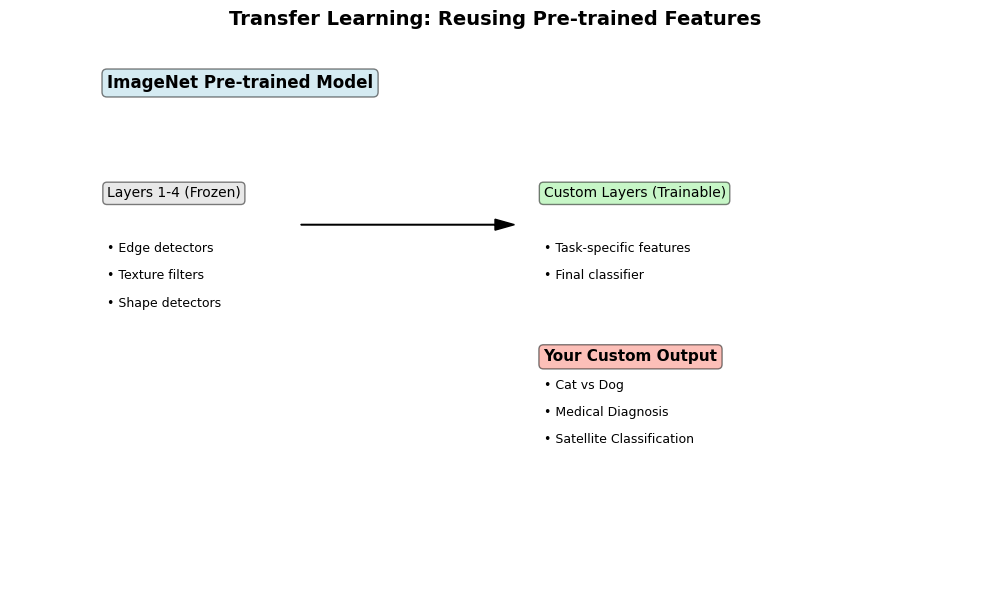


📊 Transfer Learning Benefits:
Metric                    From Scratch    Transfer Learning
------------------------------------------------------------
Training Time             10-100 hours    1-10 hours     
Required Data             10K-100K        100-1K         
Accuracy (Typical)        70-80%          85-95%         
Compute Cost              $$$$            $              

🎯 Coming in Lecture 4:
• Detailed transfer learning implementation
• Fine-tuning strategies
• Handling domain adaptation
• Real-world deployment examples

💡 Homework: Think about a project where transfer learning would help!


In [23]:
print("="*60)
print("TRANSFER LEARNING PREVIEW")
print("="*60)

transfer_learning_intro = """
🚀 TRANSFER LEARNING: BUILDING ON PRE-TRAINED MODELS

🔑 Core Concept: Why train from scratch when you can fine-tune?
   • Early CNN layers learn general features (edges, textures)
   • These features are useful for MANY vision tasks
   • Only need to retrain later layers for your SPECIFIC task

📊 Why It Works So Well:
   • 10-100x less training data needed
   • 10-100x faster training
   • Better performance even with small datasets
   • Leverages knowledge from large datasets (ImageNet: 1.2M images)

🎯 Real-World Impact:
   • Medical Imaging: Diagnose diseases with few labeled examples
   • Autonomous Vehicles: Adapt to new environments quickly
   • Retail: Recognize new products with minimal training
   • Agriculture: Detect plant diseases from limited data

💡 Simple Analogy:
   Learning to drive a car vs learning to ride a bicycle:
   • Both need to "see" the road (edges, signs, obstacles)
   • The "seeing" part is the same!
   • Only the "control" part is different

"""

print(transfer_learning_intro)

# Simple transfer learning example structure
print("🔧 Simple Transfer Learning Template:")
print("-" * 50)

transfer_template = """
# 1. Load pre-trained model
import torchvision.models as models
pretrained_model = models.resnet18(pretrained=True)

# 2. Freeze early layers (they already know how to "see")
for param in pretrained_model.parameters():
    param.requires_grad = False

# 3. Replace the final layer for YOUR task
#    ResNet18 final layer: 512 features → 1000 classes (ImageNet)
#    We change it to: 512 features → YOUR number of classes
num_your_classes = 10  # For CIFAR-10
pretrained_model.fc = nn.Linear(512, num_your_classes)

# 4. Train ONLY the new layer (or last few layers)
optimizer = optim.Adam(pretrained_model.fc.parameters(), lr=0.001)

# 5. Optionally: Later unfreeze some layers for fine-tuning
for param in pretrained_model.layer4.parameters():
    param.requires_grad = True
"""

print(transfer_template)

# Visualize transfer learning concept
print("\n🎨 Visualizing Transfer Learning Concept:")

# Create a simple visualization
fig, ax = plt.subplots(figsize=(10, 6))

# Draw the concept
ax.text(0.1, 0.9, "ImageNet Pre-trained Model", fontsize=12, fontweight='bold',
        bbox=dict(boxstyle='round,pad=0.3', facecolor='lightblue', alpha=0.5))

ax.text(0.1, 0.7, "Layers 1-4 (Frozen)", fontsize=10,
        bbox=dict(boxstyle='round,pad=0.3', facecolor='lightgray', alpha=0.5))
ax.text(0.1, 0.6, "• Edge detectors", fontsize=9)
ax.text(0.1, 0.55, "• Texture filters", fontsize=9)
ax.text(0.1, 0.5, "• Shape detectors", fontsize=9)

ax.arrow(0.3, 0.65, 0.2, 0, head_width=0.02, head_length=0.02, fc='black', ec='black')

ax.text(0.55, 0.7, "Custom Layers (Trainable)", fontsize=10,
        bbox=dict(boxstyle='round,pad=0.3', facecolor='lightgreen', alpha=0.5))
ax.text(0.55, 0.6, "• Task-specific features", fontsize=9)
ax.text(0.55, 0.55, "• Final classifier", fontsize=9)

ax.text(0.55, 0.4, "Your Custom Output", fontsize=11, fontweight='bold',
        bbox=dict(boxstyle='round,pad=0.3', facecolor='salmon', alpha=0.5))
ax.text(0.55, 0.35, "• Cat vs Dog", fontsize=9)
ax.text(0.55, 0.3, "• Medical Diagnosis", fontsize=9)
ax.text(0.55, 0.25, "• Satellite Classification", fontsize=9)

ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.axis('off')
ax.set_title("Transfer Learning: Reusing Pre-trained Features", fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

# Benefits comparison
print("\n📊 Transfer Learning Benefits:")
print("="*60)
print(f"{'Metric':<25} {'From Scratch':<15} {'Transfer Learning':<15}")
print("-"*60)
print(f"{'Training Time':<25} {'10-100 hours':<15} {'1-10 hours':<15}")
print(f"{'Required Data':<25} {'10K-100K':<15} {'100-1K':<15}")
print(f"{'Accuracy (Typical)':<25} {'70-80%':<15} {'85-95%':<15}")
print(f"{'Compute Cost':<25} {'$$$$':<15} {'$':<15}")
print("="*60)

print("\n🎯 Coming in Lecture 4:")
print("• Detailed transfer learning implementation")
print("• Fine-tuning strategies")
print("• Handling domain adaptation")
print("• Real-world deployment examples")
print("\n💡 Homework: Think about a project where transfer learning would help!")

# 📚 PART 10: Summary & Best Practices

## 📚 Key Takeaways

Let's consolidate everything we've learned.

In [24]:
print("="*60)
print("CNN MASTERY - KEY TAKEAWAYS")
print("="*60)

takeaways = """
🎯 1. Mathematical Foundations:
    • Convolution = template matching operation
    • Direct convolution is efficient for small kernels (3×3, 5×5)
    • No need for FFT - O(N×M×k²) vs O(N log N × M log M)

🎯 2. Why CNNs Work for Images:
    • Preserve spatial relationships
    • Parameter sharing (same filter across image)
    • Local connectivity (pixels near each other are related)

🎯 3. CNN Building Blocks:
    • Convolution: Feature extraction (learns filters)
    • Pooling: Dimensionality reduction (translation invariance)
    • BatchNorm: Training stabilization
    • Dropout: Regularization (prevents overfitting)

🎯 4. Architecture Design Patterns:
    • Start simple, then add complexity
    • Use padding='same' to preserve spatial dimensions
    • Double channels when halving spatial dimensions
    • Add BatchNorm after Conv, before activation

🎯 5. Beyond 2D Images:
    • Conv1D: Time series, text, audio
    • Conv3D: Video, volumetric data
    • Transposed Conv: Upsampling (segmentation, GANs)

🎯 6. Transfer Learning Preview:
    • Reuse pre-trained features for new tasks
    • Freeze early layers, retrain later layers
    • Dramatically reduces data and compute requirements

🎯 7. Debugging Strategy:
    • Print shapes at each layer
    • Test with small batch first
    • Check device consistency
    • Verify model mode (train/eval)

🎯 8. Performance Tips:
    • Use DataLoader with num_workers > 0
    • Apply data augmentation
    • Use learning rate scheduling
    • Monitor training/validation curves
"""

print(takeaways)

CNN MASTERY - KEY TAKEAWAYS

🎯 1. Mathematical Foundations:
    • Convolution = template matching operation
    • Direct convolution is efficient for small kernels (3×3, 5×5)
    • No need for FFT - O(N×M×k²) vs O(N log N × M log M)

🎯 2. Why CNNs Work for Images:
    • Preserve spatial relationships
    • Parameter sharing (same filter across image)
    • Local connectivity (pixels near each other are related)

🎯 3. CNN Building Blocks:
    • Convolution: Feature extraction (learns filters)
    • Pooling: Dimensionality reduction (translation invariance)
    • BatchNorm: Training stabilization
    • Dropout: Regularization (prevents overfitting)

🎯 4. Architecture Design Patterns:
    • Start simple, then add complexity
    • Use padding='same' to preserve spatial dimensions
    • Double channels when halving spatial dimensions
    • Add BatchNorm after Conv, before activation

🎯 5. Beyond 2D Images:
    • Conv1D: Time series, text, audio
    • Conv3D: Video, volumetric data
    • Tra

## ✍️ Exercises

Test your understanding with these exercises:

### Exercise 1: Fix the Broken CNN
```python
# This CNN has shape errors. Find and fix them:
class BrokenExerciseCNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=5, stride=2)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3)
        self.fc = nn.Linear(64 * 6 * 6, 10)  # Is this correct?
    
    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))
        x = x.view(x.size(0), -1)
        x = self.fc(x)
        return x
```

### Exercise 2: Design for Different Input Sizes
Try to get the highest accuracy on CIFAR-10 using a CNN architecture you build from scratch. Experiment with:
1. Different number of layers (3, 5, 7)
2. Different kernel sizes (3, 5)
3. Different pooling strategies (MaxPool, AvgPool)

### Exercise 3: Visualize Feature Maps
Using forward hooks, visualize the feature maps from each convolutional layer of your CNN trained on CIFAR-10. Analyze what each layer is learning.

### Exercise 4: Performance Analysis
Compare:
1. With vs without BatchNorm
2. With vs without Dropout
3. Different learning rates (0.001, 0.01, 0.1)


## ✅ Mastery Checklist

Before moving to the next lecture, ensure you can do all of the following:

- [ ] Explain the mathematical foundation of convolution
- [ ] Explain why linear layers fail for image data
- [ ] Implement convolution operations manually
- [ ] Build and train a simple CNN from scratch
- [ ] Explain the purpose of each CNN component (Conv, Pool, BatchNorm, Dropout)
- [ ] Implement AlexNet architecture
- [ ] Visualize and interpret CNN feature maps
- [ ] Apply convolutions to 1D, 2D, and 3D data
- [ ] Debug common CNN shape mismatches
- [ ] Compare CNN architectures (parameters vs accuracy)
- [ ] Design CNNs for different input sizes and tasks
- [ ] Explain the concept of transfer learning

If you can check all these boxes, you have mastered Convolutional Neural Networks!

## 📚 Practice & Reflection

### 🔍 **Conceptual Questions**

1. **What's the difference between `nn.Conv2d` and `nn.Linear`?**
   - When would you use each?
   - What are the parameter efficiency differences?

2. **Why is padding important in CNNs?**
   - What happens without padding?
   - What's the difference between 'valid' and 'same' padding?

3. **How does BatchNorm help with training?**
   - What problem does it solve?
   - Why does it behave differently during training vs inference?

4. **What's the trade-off between kernel size and stride?**
   - When would you use larger kernels?
   - When would you use larger strides?

### 🎯 **Application Questions**

1. **How would you design a CNN for:**
   - Medical image analysis (X-rays, MRI)
   - Satellite imagery classification
   - Real-time video analysis

2. **What optimizations would you make for:**
   - Mobile deployment (limited compute)
   - Real-time inference (low latency)
   - Large datasets (distributed training)

## 🗺️ **THE BIG PICTURE: How It All Connects**

```
┌─────────────────────────────────────────────────────────────┐
│                    YOUR LEARNING JOURNEY                    │
├─────────────────────────────────────────────────────────────┤
│  LECTURE 1 & 2          →        THIS LECTURE              │
│  • PyTorch Basics       │   • Mathematical Foundations    │
│  • Training Loops       │   • Why Dense Nets Fail         │
│  • Data Pipelines       │   • Signal Processing Basics    │
│                         │   • CNN Building Blocks        │
│                         │   • Kernel Visualization       │
│                         │   • Architecture Comparison    │
│                         │   • SimpleCNN → AlexNet        │
│                         │   • Transfer Learning Preview  │
├─────────────────────────────────────────────────────────────┤
│                    → FUTURE LECTURES →                    │
│  • Transfer Learning (Lecture 4)                          │
│  • ResNet (Skip Connections)                              │
│  • Object Detection (YOLO, Faster R-CNN)                  │
│  • Semantic Segmentation                                  │
└─────────────────────────────────────────────────────────────┘

🔑 KEY TAKEAWAY: Today you learned the FOUNDATION that all modern
                  computer vision is built upon!
```

<div align="center">
  
### **🌟 Building AI Mastery, One Convolution at a Time**

*"CNNs don't just see pixels—they see patterns, relationships, and meaning in the spatial world around us."*

**SAIR Community - Sudanese Artificial Intelligence Research**

</div>